In [1]:
# !pip3 install squaternion

In [1]:
import os
import gym
import time
from ascento_gym import Ascento
# from balance_pend import InvertedPendulumEnv as Ascento
from stable_baselines3 import PPO, DDPG, SAC
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [2]:
# env = Ascento()
# env.reset_model()
# for i_episode in range(150):
#     observation = env.reset()
#     done = None
#     while not done:
#         env.render()
#         print(env.yaw)
#         action = env.action_space.sample()
# #         action[2] = 1
# #         action[3] = 1

#         observation, reward, done, info = env.step(action)
        
# env.close()

In [3]:
env = Ascento()

/home/bmsit/.local/lib/python3.6/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [4]:
env.reset_model()

array([ 2.50653708e+00,  5.54769695e-03,  7.91810233e-01, -8.99110199e-03,
        1.31662288e-02, -6.27203297e+00, -5.54978574e-03,  2.01209707e-03,
       -6.42936714e-03, -2.30647056e-03,  7.39075246e-04,  3.43360622e-04])

In [5]:
env.action_space

Box([-1. -1. -1. -1.], [1. 1. 1. 1.], (4,), float32)

In [6]:
env.action_space.sample()

array([-0.1865658 , -0.05869308, -0.47286385, -0.3740179 ], dtype=float32)

In [7]:
env.observation_space

Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf inf], (12,), float64)

In [8]:
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample()

array([ 0.77887636, -0.62552128, -0.31807912, -1.00353629, -1.53367033,
       -2.09505598, -0.15921661,  1.46301218, -2.05553094, -1.21583457,
        1.20236824, -0.24364779])

## Training

In [9]:
from stable_baselines3.common.env_util import make_vec_env

In [10]:
vec_env = make_vec_env(Ascento, n_envs=1)

In [11]:
env = Ascento()
env = DummyVecEnv([lambda: env])

In [12]:
save_path = os.path.join('Training', 'models_ascento')

In [13]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold = 20*1e5, verbose = 1)

eval_callback = EvalCallback(env, callback_on_new_best = stop_callback,
                            eval_freq = 5000, best_model_save_path = save_path, verbose = 1)

In [14]:
logs_dir = os.path.join('Training', 'logs_dir_ascento')
model = PPO('MlpPolicy', vec_env, verbose = 1, tensorboard_log = logs_dir, create_eval_env = True)

Using cpu device


In [15]:
# model.load('/home/bmsit/Ascento/jointed_limited/Training/models_ascento/best_model.zip')

In [16]:
model = PPO.load("/home/bmsit/Ascento/jointed_limited/Training/models_ascento/ppo_jl_ramp_top_v3.zip", env = vec_env)

In [ ]:
model.learn(total_timesteps = 5_000_000, callback = eval_callback)

Logging to Training/logs_dir_ascento/PPO_63
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 253      |
|    ep_rew_mean     | -7.9e+03 |
| time/              |          |
|    fps             | 1637     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 283         |
|    ep_rew_mean          | -4.67e+04   |
| time/                   |             |
|    fps                  | 1265        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.003135209 |
|    clip_fraction        | 0.012       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.15        |
|    explained_variance   | 

/home/bmsit/.local/lib/python3.6/site-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=5000, episode_reward=-10246.17 +/- 12116.71
Episode length: 400.60 +/- 331.09
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 401           |
|    mean_reward          | -1.02e+04     |
| time/                   |               |
|    total_timesteps      | 5000          |
| train/                  |               |
|    approx_kl            | 5.9025377e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | 1.15          |
|    explained_variance   | 0.35          |
|    learning_rate        | 0.0003        |
|    loss                 | 7.24e+07      |
|    n_updates            | 50880         |
|    policy_gradient_loss | -3.66e-05     |
|    std                  | 0.244         |
|    value_loss           | 9.46e+07      |
-------------------------------------------
New best mean reward!
----------------------------------
| rollout/

/home/bmsit/.local/lib/python3.6/site-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=10000, episode_reward=-2162.80 +/- 6596.65
Episode length: 427.20 +/- 332.14
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 427         |
|    mean_reward          | -2.16e+03   |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.009055714 |
|    clip_fraction        | 0.047       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.15        |
|    explained_variance   | 0.682       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.67e+04    |
|    n_updates            | 50900       |
|    policy_gradient_loss | -0.00195    |
|    std                  | 0.244       |
|    value_loss           | 1.84e+05    |
-----------------------------------------
New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_me

Eval num_timesteps=25000, episode_reward=-7622.91 +/- 11189.12
Episode length: 449.20 +/- 338.84
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 449        |
|    mean_reward          | -7.62e+03  |
| time/                   |            |
|    total_timesteps      | 25000      |
| train/                  |            |
|    approx_kl            | 0.00717491 |
|    clip_fraction        | 0.0386     |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.14       |
|    explained_variance   | 0.837      |
|    learning_rate        | 0.0003     |
|    loss                 | 8.99e+05   |
|    n_updates            | 50980      |
|    policy_gradient_loss | -0.00535   |
|    std                  | 0.244      |
|    value_loss           | 1.21e+06   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 384       |
|    ep_rew_mean   

New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 441       |
|    ep_rew_mean     | -2.88e+04 |
| time/              |           |
|    fps             | 822       |
|    iterations      | 20        |
|    time_elapsed    | 49        |
|    total_timesteps | 40960     |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 446         |
|    ep_rew_mean          | -2.79e+04   |
| time/                   |             |
|    fps                  | 832         |
|    iterations           | 21          |
|    time_elapsed         | 51          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.005132852 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.15        |
|    explained_variance   | 0.44        

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | -2.1e+04    |
| time/                   |             |
|    fps                  | 754         |
|    iterations           | 29          |
|    time_elapsed         | 78          |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.008278912 |
|    clip_fraction        | 0.0569      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.16        |
|    explained_variance   | 0.477       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.83e+07    |
|    n_updates            | 51140       |
|    policy_gradient_loss | -0.00273    |
|    std                  | 0.244       |
|    value_loss           | 4.19e+07    |
-----------------------------------------
Eval num_timesteps=60000, episode_reward=-455.62 +/- 6777.12
Episode length:

Eval num_timesteps=75000, episode_reward=1133.64 +/- 9264.59
Episode length: 1536.00 +/- 1759.09
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.54e+03    |
|    mean_reward          | 1.13e+03    |
| time/                   |             |
|    total_timesteps      | 75000       |
| train/                  |             |
|    approx_kl            | 0.008933416 |
|    clip_fraction        | 0.117       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.16        |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.03e+03    |
|    n_updates            | 51220       |
|    policy_gradient_loss | -0.003      |
|    std                  | 0.245       |
|    value_loss           | 6.46e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 611       |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 599       |
|    ep_rew_mean     | -1.24e+04 |
| time/              |           |
|    fps             | 707       |
|    iterations      | 44        |
|    time_elapsed    | 127       |
|    total_timesteps | 90112     |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 589          |
|    ep_rew_mean          | -1.21e+04    |
| time/                   |              |
|    fps                  | 713          |
|    iterations           | 45           |
|    time_elapsed         | 129          |
|    total_timesteps      | 92160        |
| train/                  |              |
|    approx_kl            | 0.0074208635 |
|    clip_fraction        | 0.0485       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.17         |
|    explained_variance   | 0.721        |
|    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 679       |
|    ep_rew_mean     | -1.41e+04 |
| time/              |           |
|    fps             | 705       |
|    iterations      | 52        |
|    time_elapsed    | 150       |
|    total_timesteps | 106496    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 661          |
|    ep_rew_mean          | -1.54e+04    |
| time/                   |              |
|    fps                  | 710          |
|    iterations           | 53           |
|    time_elapsed         | 152          |
|    total_timesteps      | 108544       |
| train/                  |              |
|    approx_kl            | 0.0042057517 |
|    clip_fraction        | 0.0686       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.2          |
|    explained_variance   | 0.428        |
|    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 557         |
|    ep_rew_mean          | -1.38e+04   |
| time/                   |             |
|    fps                  | 709         |
|    iterations           | 61          |
|    time_elapsed         | 175         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.007971609 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.19        |
|    explained_variance   | 0.807       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.42e+04    |
|    n_updates            | 51460       |
|    policy_gradient_loss | -0.00379    |
|    std                  | 0.242       |
|    value_loss           | 6.29e+04    |
-----------------------------------------
Eval num_timesteps=125000, episode_reward=-1545.11 +/- 4266.72
Episode lengt

Eval num_timesteps=140000, episode_reward=-4049.14 +/- 11871.18
Episode length: 458.60 +/- 572.94
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 459         |
|    mean_reward          | -4.05e+03   |
| time/                   |             |
|    total_timesteps      | 140000      |
| train/                  |             |
|    approx_kl            | 0.021435494 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.2         |
|    explained_variance   | 0.512       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.06e+05    |
|    n_updates            | 51540       |
|    policy_gradient_loss | 0.00474     |
|    std                  | 0.243       |
|    value_loss           | 1.4e+07     |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 403       |

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 456      |
|    ep_rew_mean     | -1e+04   |
| time/              |          |
|    fps             | 718      |
|    iterations      | 76       |
|    time_elapsed    | 216      |
|    total_timesteps | 155648   |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 446          |
|    ep_rew_mean          | -1.04e+04    |
| time/                   |              |
|    fps                  | 721          |
|    iterations           | 77           |
|    time_elapsed         | 218          |
|    total_timesteps      | 157696       |
| train/                  |              |
|    approx_kl            | 0.0024101543 |
|    clip_fraction        | 0.00288      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.22         |
|    explained_variance   | 0.507        |
|    learning_r

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 466       |
|    ep_rew_mean     | -1.95e+04 |
| time/              |           |
|    fps             | 718       |
|    iterations      | 84        |
|    time_elapsed    | 239       |
|    total_timesteps | 172032    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 470         |
|    ep_rew_mean          | -2.16e+04   |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 85          |
|    time_elapsed         | 241         |
|    total_timesteps      | 174080      |
| train/                  |             |
|    approx_kl            | 0.007356544 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.22        |
|    explained_variance   | 0.75        |
|    learning_rate  

Eval num_timesteps=190000, episode_reward=-268.84 +/- 10994.34
Episode length: 1383.60 +/- 1857.29
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.38e+03    |
|    mean_reward          | -269        |
| time/                   |             |
|    total_timesteps      | 190000      |
| train/                  |             |
|    approx_kl            | 0.008993267 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.22        |
|    explained_variance   | 0.83        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.6e+03     |
|    n_updates            | 51780       |
|    policy_gradient_loss | 0.000638    |
|    std                  | 0.241       |
|    value_loss           | 1.36e+05    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 457       

Eval num_timesteps=205000, episode_reward=-7209.21 +/- 9088.39
Episode length: 1298.20 +/- 1873.81
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.3e+03     |
|    mean_reward          | -7.21e+03   |
| time/                   |             |
|    total_timesteps      | 205000      |
| train/                  |             |
|    approx_kl            | 0.005842621 |
|    clip_fraction        | 0.0483      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.23        |
|    explained_variance   | 0.505       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.25e+04    |
|    n_updates            | 51860       |
|    policy_gradient_loss | 0.000708    |
|    std                  | 0.241       |
|    value_loss           | 1.6e+07     |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 374       

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 306       |
|    ep_rew_mean     | -1.41e+04 |
| time/              |           |
|    fps             | 728       |
|    iterations      | 108       |
|    time_elapsed    | 303       |
|    total_timesteps | 221184    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 316         |
|    ep_rew_mean          | -1.45e+04   |
| time/                   |             |
|    fps                  | 730         |
|    iterations           | 109         |
|    time_elapsed         | 305         |
|    total_timesteps      | 223232      |
| train/                  |             |
|    approx_kl            | 0.010437475 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.23        |
|    explained_variance   | 0.618       |
|    learning_rate  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 371          |
|    ep_rew_mean          | -1.43e+04    |
| time/                   |              |
|    fps                  | 743          |
|    iterations           | 117          |
|    time_elapsed         | 322          |
|    total_timesteps      | 239616       |
| train/                  |              |
|    approx_kl            | 0.0072961543 |
|    clip_fraction        | 0.0611       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.25         |
|    explained_variance   | 0.638        |
|    learning_rate        | 0.0003       |
|    loss                 | 8.53e+03     |
|    n_updates            | 52020        |
|    policy_gradient_loss | -0.00365     |
|    std                  | 0.24         |
|    value_loss           | 6.26e+04     |
------------------------------------------
Eval num_timesteps=240000, episode_reward=-29685.84 +/

Eval num_timesteps=255000, episode_reward=3625.43 +/- 5400.42
Episode length: 478.40 +/- 431.13
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 478        |
|    mean_reward          | 3.63e+03   |
| time/                   |            |
|    total_timesteps      | 255000     |
| train/                  |            |
|    approx_kl            | 0.01096973 |
|    clip_fraction        | 0.124      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.25       |
|    explained_variance   | 0.704      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.94e+03   |
|    n_updates            | 52100      |
|    policy_gradient_loss | -0.000153  |
|    std                  | 0.239      |
|    value_loss           | 2.31e+06   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 444       |
|    ep_rew_mean    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 450       |
|    ep_rew_mean     | -1.89e+04 |
| time/              |           |
|    fps             | 745       |
|    iterations      | 132       |
|    time_elapsed    | 362       |
|    total_timesteps | 270336    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 472          |
|    ep_rew_mean          | -2.06e+04    |
| time/                   |              |
|    fps                  | 747          |
|    iterations           | 133          |
|    time_elapsed         | 364          |
|    total_timesteps      | 272384       |
| train/                  |              |
|    approx_kl            | 0.0067868503 |
|    clip_fraction        | 0.0621       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.24         |
|    explained_variance   | 0.968        |
|    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 537       |
|    ep_rew_mean     | -2.54e+04 |
| time/              |           |
|    fps             | 750       |
|    iterations      | 140       |
|    time_elapsed    | 381       |
|    total_timesteps | 286720    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 515         |
|    ep_rew_mean          | -2.57e+04   |
| time/                   |             |
|    fps                  | 752         |
|    iterations           | 141         |
|    time_elapsed         | 383         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.004668073 |
|    clip_fraction        | 0.05        |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.25        |
|    explained_variance   | 0.721       |
|    learning_rate  

Eval num_timesteps=305000, episode_reward=-105973.37 +/- 174703.49
Episode length: 417.60 +/- 360.35
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 418         |
|    mean_reward          | -1.06e+05   |
| time/                   |             |
|    total_timesteps      | 305000      |
| train/                  |             |
|    approx_kl            | 0.012193739 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.27        |
|    explained_variance   | 0.741       |
|    learning_rate        | 0.0003      |
|    loss                 | 551         |
|    n_updates            | 52340       |
|    policy_gradient_loss | -0.00204    |
|    std                  | 0.241       |
|    value_loss           | 2.01e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 583     

Eval num_timesteps=320000, episode_reward=-61621.53 +/- 95344.16
Episode length: 1649.00 +/- 1887.63
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.65e+03     |
|    mean_reward          | -6.16e+04    |
| time/                   |              |
|    total_timesteps      | 320000       |
| train/                  |              |
|    approx_kl            | 0.0028975792 |
|    clip_fraction        | 0.0114       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.26         |
|    explained_variance   | 0.448        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.69e+07     |
|    n_updates            | 52420        |
|    policy_gradient_loss | -0.00374     |
|    std                  | 0.241        |
|    value_loss           | 8.47e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 685       |
|    ep_rew_mean     | -3.54e+04 |
| time/              |           |
|    fps             | 722       |
|    iterations      | 164       |
|    time_elapsed    | 465       |
|    total_timesteps | 335872    |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 684        |
|    ep_rew_mean          | -3.54e+04  |
| time/                   |            |
|    fps                  | 723        |
|    iterations           | 165        |
|    time_elapsed         | 466        |
|    total_timesteps      | 337920     |
| train/                  |            |
|    approx_kl            | 0.01099241 |
|    clip_fraction        | 0.0924     |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.25       |
|    explained_variance   | 0.8        |
|    learning_rate        | 0.0003 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 774         |
|    ep_rew_mean          | -3.38e+04   |
| time/                   |             |
|    fps                  | 704         |
|    iterations           | 173         |
|    time_elapsed         | 503         |
|    total_timesteps      | 354304      |
| train/                  |             |
|    approx_kl            | 0.008836072 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.27        |
|    explained_variance   | 0.893       |
|    learning_rate        | 0.0003      |
|    loss                 | 272         |
|    n_updates            | 52580       |
|    policy_gradient_loss | 0.00144     |
|    std                  | 0.241       |
|    value_loss           | 2.28e+03    |
-----------------------------------------
Eval num_timesteps=355000, episode_reward=-158374.23 +/- 172875.00
Episode l

Eval num_timesteps=370000, episode_reward=-91386.15 +/- 179152.00
Episode length: 3214.60 +/- 1825.05
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 3.21e+03   |
|    mean_reward          | -9.14e+04  |
| time/                   |            |
|    total_timesteps      | 370000     |
| train/                  |            |
|    approx_kl            | 0.01131259 |
|    clip_fraction        | 0.139      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.34       |
|    explained_variance   | 0.941      |
|    learning_rate        | 0.0003     |
|    loss                 | 102        |
|    n_updates            | 52660      |
|    policy_gradient_loss | -0.0039    |
|    std                  | 0.239      |
|    value_loss           | 257        |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 847       |
|    ep_rew_me

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 958       |
|    ep_rew_mean     | -3.16e+04 |
| time/              |           |
|    fps             | 667       |
|    iterations      | 188       |
|    time_elapsed    | 577       |
|    total_timesteps | 385024    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 994          |
|    ep_rew_mean          | -3.67e+04    |
| time/                   |              |
|    fps                  | 668          |
|    iterations           | 189          |
|    time_elapsed         | 578          |
|    total_timesteps      | 387072       |
| train/                  |              |
|    approx_kl            | 0.0071885316 |
|    clip_fraction        | 0.0614       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.44         |
|    explained_variance   | 0.921        |
|    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.1e+03   |
|    ep_rew_mean     | -5.29e+04 |
| time/              |           |
|    fps             | 664       |
|    iterations      | 196       |
|    time_elapsed    | 604       |
|    total_timesteps | 401408    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.12e+03     |
|    ep_rew_mean          | -5.63e+04    |
| time/                   |              |
|    fps                  | 665          |
|    iterations           | 197          |
|    time_elapsed         | 606          |
|    total_timesteps      | 403456       |
| train/                  |              |
|    approx_kl            | 0.0009334283 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.46         |
|    explained_variance   | 0.563        |
|    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.2e+03      |
|    ep_rew_mean          | -7.22e+04    |
| time/                   |              |
|    fps                  | 664          |
|    iterations           | 205          |
|    time_elapsed         | 632          |
|    total_timesteps      | 419840       |
| train/                  |              |
|    approx_kl            | 0.0017869014 |
|    clip_fraction        | 0.0111       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.47         |
|    explained_variance   | 0.493        |
|    learning_rate        | 0.0003       |
|    loss                 | 5.76e+07     |
|    n_updates            | 52900        |
|    policy_gradient_loss | -0.00208     |
|    std                  | 0.234        |
|    value_loss           | 1.25e+08     |
------------------------------------------
Eval num_timesteps=420000, episode_reward=-135048.50 +

Eval num_timesteps=435000, episode_reward=21209.72 +/- 91373.64
Episode length: 3469.80 +/- 2014.09
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 3.47e+03     |
|    mean_reward          | 2.12e+04     |
| time/                   |              |
|    total_timesteps      | 435000       |
| train/                  |              |
|    approx_kl            | 0.0036413847 |
|    clip_fraction        | 0.0163       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.47         |
|    explained_variance   | 0.509        |
|    learning_rate        | 0.0003       |
|    loss                 | 5.21e+07     |
|    n_updates            | 52980        |
|    policy_gradient_loss | -0.00419     |
|    std                  | 0.233        |
|    value_loss           | 6.28e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_m

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.4e+03  |
|    ep_rew_mean     | -1e+05   |
| time/              |          |
|    fps             | 648      |
|    iterations      | 220      |
|    time_elapsed    | 695      |
|    total_timesteps | 450560   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.4e+03     |
|    ep_rew_mean          | -1e+05      |
| time/                   |             |
|    fps                  | 649         |
|    iterations           | 221         |
|    time_elapsed         | 697         |
|    total_timesteps      | 452608      |
| train/                  |             |
|    approx_kl            | 0.009159516 |
|    clip_fraction        | 0.0404      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.49        |
|    explained_variance   | 0.526       |
|    learning_rate        | 0.

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.49e+03  |
|    ep_rew_mean     | -1.02e+05 |
| time/              |           |
|    fps             | 643       |
|    iterations      | 228       |
|    time_elapsed    | 725       |
|    total_timesteps | 466944    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.53e+03    |
|    ep_rew_mean          | -1.01e+05   |
| time/                   |             |
|    fps                  | 645         |
|    iterations           | 229         |
|    time_elapsed         | 727         |
|    total_timesteps      | 468992      |
| train/                  |             |
|    approx_kl            | 0.006927468 |
|    clip_fraction        | 0.0781      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.53        |
|    explained_variance   | 0.802       |
|    learning_rate  

Eval num_timesteps=485000, episode_reward=-8392.79 +/- 15011.28
Episode length: 1401.00 +/- 1880.42
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.4e+03     |
|    mean_reward          | -8.39e+03   |
| time/                   |             |
|    total_timesteps      | 485000      |
| train/                  |             |
|    approx_kl            | 0.019878749 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.54        |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.0003      |
|    loss                 | 286         |
|    n_updates            | 53220       |
|    policy_gradient_loss | -0.00656    |
|    std                  | 0.231       |
|    value_loss           | 882         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.65e+03 

Eval num_timesteps=500000, episode_reward=-32703.56 +/- 131749.85
Episode length: 3051.60 +/- 2386.38
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.05e+03    |
|    mean_reward          | -3.27e+04   |
| time/                   |             |
|    total_timesteps      | 500000      |
| train/                  |             |
|    approx_kl            | 0.016790252 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.57        |
|    explained_variance   | 0.855       |
|    learning_rate        | 0.0003      |
|    loss                 | 303         |
|    n_updates            | 53300       |
|    policy_gradient_loss | -0.00474    |
|    std                  | 0.231       |
|    value_loss           | 1.41e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.67e+0

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.25e+03  |
|    ep_rew_mean     | -1.03e+05 |
| time/              |           |
|    fps             | 628       |
|    iterations      | 252       |
|    time_elapsed    | 821       |
|    total_timesteps | 516096    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.21e+03    |
|    ep_rew_mean          | -1.01e+05   |
| time/                   |             |
|    fps                  | 629         |
|    iterations           | 253         |
|    time_elapsed         | 823         |
|    total_timesteps      | 518144      |
| train/                  |             |
|    approx_kl            | 0.009138817 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.6         |
|    explained_variance   | 0.783       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.18e+03    |
|    ep_rew_mean          | -7.77e+04   |
| time/                   |             |
|    fps                  | 629         |
|    iterations           | 261         |
|    time_elapsed         | 849         |
|    total_timesteps      | 534528      |
| train/                  |             |
|    approx_kl            | 0.013963266 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.62        |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | 459         |
|    n_updates            | 53460       |
|    policy_gradient_loss | -0.00318    |
|    std                  | 0.228       |
|    value_loss           | 1.8e+03     |
-----------------------------------------
Eval num_timesteps=535000, episode_reward=-118839.09 +/- 98529.73
Episode le

Eval num_timesteps=550000, episode_reward=-6852.56 +/- 5561.56
Episode length: 178.40 +/- 94.31
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 178          |
|    mean_reward          | -6.85e+03    |
| time/                   |              |
|    total_timesteps      | 550000       |
| train/                  |              |
|    approx_kl            | 0.0018665087 |
|    clip_fraction        | 0.00645      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.63         |
|    explained_variance   | 0.626        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.36e+05     |
|    n_updates            | 53540        |
|    policy_gradient_loss | -0.00359     |
|    std                  | 0.227        |
|    value_loss           | 5.95e+06     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 658       |
|    ep_rew_mean     | -3.47e+04 |
| time/              |           |
|    fps             | 630       |
|    iterations      | 276       |
|    time_elapsed    | 897       |
|    total_timesteps | 565248    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 658         |
|    ep_rew_mean          | -3.47e+04   |
| time/                   |             |
|    fps                  | 631         |
|    iterations           | 277         |
|    time_elapsed         | 898         |
|    total_timesteps      | 567296      |
| train/                  |             |
|    approx_kl            | 0.009744631 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.63        |
|    explained_variance   | 0.507       |
|    learning_rate  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 668      |
|    ep_rew_mean     | -3.9e+04 |
| time/              |          |
|    fps             | 635      |
|    iterations      | 284      |
|    time_elapsed    | 914      |
|    total_timesteps | 581632   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 711         |
|    ep_rew_mean          | -3.9e+04    |
| time/                   |             |
|    fps                  | 636         |
|    iterations           | 285         |
|    time_elapsed         | 916         |
|    total_timesteps      | 583680      |
| train/                  |             |
|    approx_kl            | 0.014968387 |
|    clip_fraction        | 0.298       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.65        |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.

Eval num_timesteps=600000, episode_reward=-197350.35 +/- 98225.19
Episode length: 222.20 +/- 103.13
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 222         |
|    mean_reward          | -1.97e+05   |
| time/                   |             |
|    total_timesteps      | 600000      |
| train/                  |             |
|    approx_kl            | 0.016349196 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.68        |
|    explained_variance   | 0.852       |
|    learning_rate        | 0.0003      |
|    loss                 | 501         |
|    n_updates            | 53780       |
|    policy_gradient_loss | -0.00227    |
|    std                  | 0.225       |
|    value_loss           | 1.28e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 531      

Eval num_timesteps=615000, episode_reward=-50832.43 +/- 97246.94
Episode length: 587.80 +/- 773.25
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 588        |
|    mean_reward          | -5.08e+04  |
| time/                   |            |
|    total_timesteps      | 615000     |
| train/                  |            |
|    approx_kl            | 0.00401276 |
|    clip_fraction        | 0.0152     |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.69       |
|    explained_variance   | 0.843      |
|    learning_rate        | 0.0003     |
|    loss                 | 6.91e+05   |
|    n_updates            | 53860      |
|    policy_gradient_loss | -0.0062    |
|    std                  | 0.224      |
|    value_loss           | 2.6e+06    |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 500       |
|    ep_rew_mean 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 556       |
|    ep_rew_mean     | -6.38e+04 |
| time/              |           |
|    fps             | 644       |
|    iterations      | 308       |
|    time_elapsed    | 978       |
|    total_timesteps | 630784    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 566          |
|    ep_rew_mean          | -6.4e+04     |
| time/                   |              |
|    fps                  | 645          |
|    iterations           | 309          |
|    time_elapsed         | 980          |
|    total_timesteps      | 632832       |
| train/                  |              |
|    approx_kl            | 0.0131467115 |
|    clip_fraction        | 0.0682       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.74         |
|    explained_variance   | 0.597        |
|    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 603         |
|    ep_rew_mean          | -5.02e+04   |
| time/                   |             |
|    fps                  | 647         |
|    iterations           | 317         |
|    time_elapsed         | 1003        |
|    total_timesteps      | 649216      |
| train/                  |             |
|    approx_kl            | 0.008563176 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.76        |
|    explained_variance   | 0.74        |
|    learning_rate        | 0.0003      |
|    loss                 | 3.49e+04    |
|    n_updates            | 54020       |
|    policy_gradient_loss | -0.00409    |
|    std                  | 0.221       |
|    value_loss           | 2.65e+04    |
-----------------------------------------
Eval num_timesteps=650000, episode_reward=-7802.93 +/- 21744.27
Episode leng

Eval num_timesteps=665000, episode_reward=-110312.65 +/- 92448.29
Episode length: 189.20 +/- 213.82
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 189           |
|    mean_reward          | -1.1e+05      |
| time/                   |               |
|    total_timesteps      | 665000        |
| train/                  |               |
|    approx_kl            | 0.00031739913 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | 1.77          |
|    explained_variance   | 0.521         |
|    learning_rate        | 0.0003        |
|    loss                 | 1.03e+07      |
|    n_updates            | 54100         |
|    policy_gradient_loss | -0.00154      |
|    std                  | 0.221         |
|    value_loss           | 3.68e+07      |
-------------------------------------------
----------------------------------
| rollout/           |       

Eval num_timesteps=680000, episode_reward=-73121.36 +/- 53528.60
Episode length: 62.60 +/- 37.47
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 62.6         |
|    mean_reward          | -7.31e+04    |
| time/                   |              |
|    total_timesteps      | 680000       |
| train/                  |              |
|    approx_kl            | 0.0026133973 |
|    clip_fraction        | 0.00767      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.78         |
|    explained_variance   | 0.495        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.74e+07     |
|    n_updates            | 54180        |
|    policy_gradient_loss | -0.000885    |
|    std                  | 0.222        |
|    value_loss           | 6.45e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 629      |
|    ep_rew_mean     | -5.7e+04 |
| time/              |          |
|    fps             | 653      |
|    iterations      | 340      |
|    time_elapsed    | 1065     |
|    total_timesteps | 696320   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 661         |
|    ep_rew_mean          | -6.02e+04   |
| time/                   |             |
|    fps                  | 654         |
|    iterations           | 341         |
|    time_elapsed         | 1067        |
|    total_timesteps      | 698368      |
| train/                  |             |
|    approx_kl            | 0.011356702 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.81        |
|    explained_variance   | 0.812       |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 724         |
|    ep_rew_mean          | -7.29e+04   |
| time/                   |             |
|    fps                  | 658         |
|    iterations           | 349         |
|    time_elapsed         | 1085        |
|    total_timesteps      | 714752      |
| train/                  |             |
|    approx_kl            | 0.009953931 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.84        |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | 177         |
|    n_updates            | 54340       |
|    policy_gradient_loss | -0.0036     |
|    std                  | 0.218       |
|    value_loss           | 537         |
-----------------------------------------
Eval num_timesteps=715000, episode_reward=-94933.65 +/- 84185.72
Episode len

Eval num_timesteps=730000, episode_reward=-10753.71 +/- 10394.18
Episode length: 222.00 +/- 128.76
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 222          |
|    mean_reward          | -1.08e+04    |
| time/                   |              |
|    total_timesteps      | 730000       |
| train/                  |              |
|    approx_kl            | 0.0017057378 |
|    clip_fraction        | 0.00342      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.87         |
|    explained_variance   | 0.507        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.08e+07     |
|    n_updates            | 54420        |
|    policy_gradient_loss | -0.00242     |
|    std                  | 0.217        |
|    value_loss           | 6.81e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_me

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 728       |
|    ep_rew_mean     | -7.53e+04 |
| time/              |           |
|    fps             | 663       |
|    iterations      | 364       |
|    time_elapsed    | 1123      |
|    total_timesteps | 745472    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 720          |
|    ep_rew_mean          | -7.63e+04    |
| time/                   |              |
|    fps                  | 662          |
|    iterations           | 365          |
|    time_elapsed         | 1128         |
|    total_timesteps      | 747520       |
| train/                  |              |
|    approx_kl            | 0.0049549844 |
|    clip_fraction        | 0.0366       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.89         |
|    explained_variance   | 0.512        |
|    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 690       |
|    ep_rew_mean     | -6.23e+04 |
| time/              |           |
|    fps             | 665       |
|    iterations      | 372       |
|    time_elapsed    | 1144      |
|    total_timesteps | 761856    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 599          |
|    ep_rew_mean          | -5.88e+04    |
| time/                   |              |
|    fps                  | 666          |
|    iterations           | 373          |
|    time_elapsed         | 1146         |
|    total_timesteps      | 763904       |
| train/                  |              |
|    approx_kl            | 0.0044584014 |
|    clip_fraction        | 0.0194       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.89         |
|    explained_variance   | 0.49         |
|    

Eval num_timesteps=780000, episode_reward=-54551.81 +/- 73936.34
Episode length: 199.60 +/- 249.19
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 200          |
|    mean_reward          | -5.46e+04    |
| time/                   |              |
|    total_timesteps      | 780000       |
| train/                  |              |
|    approx_kl            | 0.0026646089 |
|    clip_fraction        | 0.0354       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.9          |
|    explained_variance   | 0.52         |
|    learning_rate        | 0.0003       |
|    loss                 | 7.23e+06     |
|    n_updates            | 54660        |
|    policy_gradient_loss | -0.000454    |
|    std                  | 0.216        |
|    value_loss           | 2.04e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_me

Eval num_timesteps=795000, episode_reward=-51251.03 +/- 81899.95
Episode length: 85.20 +/- 68.10
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 85.2         |
|    mean_reward          | -5.13e+04    |
| time/                   |              |
|    total_timesteps      | 795000       |
| train/                  |              |
|    approx_kl            | 0.0064244457 |
|    clip_fraction        | 0.0518       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.9          |
|    explained_variance   | 0.49         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.55e+05     |
|    n_updates            | 54740        |
|    policy_gradient_loss | -0.00134     |
|    std                  | 0.215        |
|    value_loss           | 3.04e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 537       |
|    ep_rew_mean     | -2.48e+04 |
| time/              |           |
|    fps             | 673       |
|    iterations      | 396       |
|    time_elapsed    | 1203      |
|    total_timesteps | 811008    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 562         |
|    ep_rew_mean          | -2.5e+04    |
| time/                   |             |
|    fps                  | 674         |
|    iterations           | 397         |
|    time_elapsed         | 1205        |
|    total_timesteps      | 813056      |
| train/                  |             |
|    approx_kl            | 0.014009013 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.94        |
|    explained_variance   | 0.956       |
|    learning_rate  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 636          |
|    ep_rew_mean          | -3.47e+04    |
| time/                   |              |
|    fps                  | 676          |
|    iterations           | 405          |
|    time_elapsed         | 1226         |
|    total_timesteps      | 829440       |
| train/                  |              |
|    approx_kl            | 0.0014241261 |
|    clip_fraction        | 0.0101       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.92         |
|    explained_variance   | 0.559        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.6e+06      |
|    n_updates            | 54900        |
|    policy_gradient_loss | -0.000308    |
|    std                  | 0.213        |
|    value_loss           | 1.32e+07     |
------------------------------------------
Eval num_timesteps=830000, episode_reward=-75286.80 +/

Eval num_timesteps=845000, episode_reward=47.21 +/- 8008.89
Episode length: 476.60 +/- 358.90
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 477          |
|    mean_reward          | 47.2         |
| time/                   |              |
|    total_timesteps      | 845000       |
| train/                  |              |
|    approx_kl            | 0.0070271953 |
|    clip_fraction        | 0.133        |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.95         |
|    explained_variance   | 0.591        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.19e+06     |
|    n_updates            | 54980        |
|    policy_gradient_loss | -0.000834    |
|    std                  | 0.211        |
|    value_loss           | 1.44e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean   

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 700       |
|    ep_rew_mean     | -3.48e+04 |
| time/              |           |
|    fps             | 679       |
|    iterations      | 420       |
|    time_elapsed    | 1266      |
|    total_timesteps | 860160    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 696          |
|    ep_rew_mean          | -3.51e+04    |
| time/                   |              |
|    fps                  | 679          |
|    iterations           | 421          |
|    time_elapsed         | 1268         |
|    total_timesteps      | 862208       |
| train/                  |              |
|    approx_kl            | 0.0034942504 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.95         |
|    explained_variance   | 0.582        |
|    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 507       |
|    ep_rew_mean     | -2.67e+04 |
| time/              |           |
|    fps             | 682       |
|    iterations      | 428       |
|    time_elapsed    | 1284      |
|    total_timesteps | 876544    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 453          |
|    ep_rew_mean          | -3.27e+04    |
| time/                   |              |
|    fps                  | 682          |
|    iterations           | 429          |
|    time_elapsed         | 1286         |
|    total_timesteps      | 878592       |
| train/                  |              |
|    approx_kl            | 0.0011703009 |
|    clip_fraction        | 0.00425      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.95         |
|    explained_variance   | 0.511        |
|    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 359          |
|    ep_rew_mean          | -3.54e+04    |
| time/                   |              |
|    fps                  | 686          |
|    iterations           | 437          |
|    time_elapsed         | 1304         |
|    total_timesteps      | 894976       |
| train/                  |              |
|    approx_kl            | 0.0013198364 |
|    clip_fraction        | 0.00103      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.95         |
|    explained_variance   | 0.48         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.58e+07     |
|    n_updates            | 55220        |
|    policy_gradient_loss | -0.000548    |
|    std                  | 0.211        |
|    value_loss           | 4.16e+07     |
------------------------------------------
Eval num_timesteps=895000, episode_reward=-67783.29 +/

Eval num_timesteps=910000, episode_reward=-36363.13 +/- 58509.00
Episode length: 237.20 +/- 102.87
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 237          |
|    mean_reward          | -3.64e+04    |
| time/                   |              |
|    total_timesteps      | 910000       |
| train/                  |              |
|    approx_kl            | 0.0020047927 |
|    clip_fraction        | 0.00947      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.95         |
|    explained_variance   | 0.515        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.48e+07     |
|    n_updates            | 55300        |
|    policy_gradient_loss | -0.00404     |
|    std                  | 0.211        |
|    value_loss           | 1.92e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_me

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 426       |
|    ep_rew_mean     | -3.55e+04 |
| time/              |           |
|    fps             | 688       |
|    iterations      | 452       |
|    time_elapsed    | 1344      |
|    total_timesteps | 925696    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 413          |
|    ep_rew_mean          | -3.49e+04    |
| time/                   |              |
|    fps                  | 689          |
|    iterations           | 453          |
|    time_elapsed         | 1346         |
|    total_timesteps      | 927744       |
| train/                  |              |
|    approx_kl            | 0.0031907423 |
|    clip_fraction        | 0.00874      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.93         |
|    explained_variance   | 0.599        |
|    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 421         |
|    ep_rew_mean          | -3.05e+04   |
| time/                   |             |
|    fps                  | 691         |
|    iterations           | 461         |
|    time_elapsed         | 1366        |
|    total_timesteps      | 944128      |
| train/                  |             |
|    approx_kl            | 0.017733723 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.95        |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | 432         |
|    n_updates            | 55460       |
|    policy_gradient_loss | -0.000354   |
|    std                  | 0.211       |
|    value_loss           | 1.63e+03    |
-----------------------------------------
Eval num_timesteps=945000, episode_reward=-99425.65 +/- 99848.46
Episode len

Eval num_timesteps=960000, episode_reward=-34354.46 +/- 55659.35
Episode length: 136.60 +/- 85.94
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 137          |
|    mean_reward          | -3.44e+04    |
| time/                   |              |
|    total_timesteps      | 960000       |
| train/                  |              |
|    approx_kl            | 0.0007019745 |
|    clip_fraction        | 0.000732     |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.95         |
|    explained_variance   | 0.531        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.94e+07     |
|    n_updates            | 55540        |
|    policy_gradient_loss | -0.00154     |
|    std                  | 0.211        |
|    value_loss           | 5.21e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mea

Eval num_timesteps=975000, episode_reward=-44130.48 +/- 64308.01
Episode length: 177.20 +/- 62.13
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 177          |
|    mean_reward          | -4.41e+04    |
| time/                   |              |
|    total_timesteps      | 975000       |
| train/                  |              |
|    approx_kl            | 0.0021951133 |
|    clip_fraction        | 0.00811      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.95         |
|    explained_variance   | 0.525        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.57e+07     |
|    n_updates            | 55620        |
|    policy_gradient_loss | -0.00125     |
|    std                  | 0.211        |
|    value_loss           | 2.31e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mea

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 352       |
|    ep_rew_mean     | -3.76e+04 |
| time/              |           |
|    fps             | 699       |
|    iterations      | 484       |
|    time_elapsed    | 1416      |
|    total_timesteps | 991232    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 360          |
|    ep_rew_mean          | -3.72e+04    |
| time/                   |              |
|    fps                  | 700          |
|    iterations           | 485          |
|    time_elapsed         | 1418         |
|    total_timesteps      | 993280       |
| train/                  |              |
|    approx_kl            | 0.0027395175 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.95         |
|    explained_variance   | 0.476        |
|    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 364         |
|    ep_rew_mean          | -3.39e+04   |
| time/                   |             |
|    fps                  | 701         |
|    iterations           | 493         |
|    time_elapsed         | 1438        |
|    total_timesteps      | 1009664     |
| train/                  |             |
|    approx_kl            | 0.006063072 |
|    clip_fraction        | 0.0435      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.96        |
|    explained_variance   | 0.315       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.66e+03    |
|    n_updates            | 55780       |
|    policy_gradient_loss | -0.00086    |
|    std                  | 0.21        |
|    value_loss           | 2.17e+05    |
-----------------------------------------
Eval num_timesteps=1010000, episode_reward=-14176.35 +/- 32217.77
Episode le

Eval num_timesteps=1025000, episode_reward=-46707.09 +/- 57126.40
Episode length: 1005.60 +/- 1250.89
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.01e+03     |
|    mean_reward          | -4.67e+04    |
| time/                   |              |
|    total_timesteps      | 1025000      |
| train/                  |              |
|    approx_kl            | 0.0039689485 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.97         |
|    explained_variance   | 0.495        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.08e+07     |
|    n_updates            | 55860        |
|    policy_gradient_loss | -0.00232     |
|    std                  | 0.21         |
|    value_loss           | 2.98e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 462       |
|    ep_rew_mean     | -2.98e+04 |
| time/              |           |
|    fps             | 703       |
|    iterations      | 508       |
|    time_elapsed    | 1479      |
|    total_timesteps | 1040384   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 462         |
|    ep_rew_mean          | -2.98e+04   |
| time/                   |             |
|    fps                  | 703         |
|    iterations           | 509         |
|    time_elapsed         | 1481        |
|    total_timesteps      | 1042432     |
| train/                  |             |
|    approx_kl            | 0.006667736 |
|    clip_fraction        | 0.0416      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.97        |
|    explained_variance   | 0.533       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 543       |
|    ep_rew_mean     | -2.94e+04 |
| time/              |           |
|    fps             | 702       |
|    iterations      | 516       |
|    time_elapsed    | 1503      |
|    total_timesteps | 1056768   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 569         |
|    ep_rew_mean          | -2.96e+04   |
| time/                   |             |
|    fps                  | 702         |
|    iterations           | 517         |
|    time_elapsed         | 1507        |
|    total_timesteps      | 1058816     |
| train/                  |             |
|    approx_kl            | 0.013049165 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.96        |
|    explained_variance   | 0.925       |
|    learning_rate  

Eval num_timesteps=1075000, episode_reward=-36036.33 +/- 57701.00
Episode length: 1016.80 +/- 798.52
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.02e+03   |
|    mean_reward          | -3.6e+04   |
| time/                   |            |
|    total_timesteps      | 1075000    |
| train/                  |            |
|    approx_kl            | 0.18767625 |
|    clip_fraction        | 0.177      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.94       |
|    explained_variance   | 0.519      |
|    learning_rate        | 0.0003     |
|    loss                 | 5.28e+06   |
|    n_updates            | 56100      |
|    policy_gradient_loss | 0.00936    |
|    std                  | 0.212      |
|    value_loss           | 2.15e+07   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 666       |
|    ep_rew_mea

Eval num_timesteps=1090000, episode_reward=-4578.29 +/- 12987.47
Episode length: 409.80 +/- 713.17
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 410         |
|    mean_reward          | -4.58e+03   |
| time/                   |             |
|    total_timesteps      | 1090000     |
| train/                  |             |
|    approx_kl            | 0.012412484 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.98        |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | 624         |
|    n_updates            | 56180       |
|    policy_gradient_loss | 0.00219     |
|    std                  | 0.21        |
|    value_loss           | 2.59e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 804       

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 846      |
|    ep_rew_mean     | -3.3e+04 |
| time/              |          |
|    fps             | 703      |
|    iterations      | 540      |
|    time_elapsed    | 1572     |
|    total_timesteps | 1105920  |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 861        |
|    ep_rew_mean          | -3.15e+04  |
| time/                   |            |
|    fps                  | 703        |
|    iterations           | 541        |
|    time_elapsed         | 1574       |
|    total_timesteps      | 1107968    |
| train/                  |            |
|    approx_kl            | 0.02487038 |
|    clip_fraction        | 0.188      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.97       |
|    explained_variance   | 0.982      |
|    learning_rate        | 0.0003     |
|   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 888         |
|    ep_rew_mean          | -2.72e+04   |
| time/                   |             |
|    fps                  | 703         |
|    iterations           | 549         |
|    time_elapsed         | 1599        |
|    total_timesteps      | 1124352     |
| train/                  |             |
|    approx_kl            | 0.009578971 |
|    clip_fraction        | 0.0699      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.96        |
|    explained_variance   | 0.541       |
|    learning_rate        | 0.0003      |
|    loss                 | 1e+07       |
|    n_updates            | 56340       |
|    policy_gradient_loss | -0.00176    |
|    std                  | 0.211       |
|    value_loss           | 3.91e+07    |
-----------------------------------------
Eval num_timesteps=1125000, episode_reward=-95696.59 +/- 48565.39
Episode le

Eval num_timesteps=1140000, episode_reward=-55111.62 +/- 35362.47
Episode length: 1317.40 +/- 760.63
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.32e+03    |
|    mean_reward          | -5.51e+04   |
| time/                   |             |
|    total_timesteps      | 1140000     |
| train/                  |             |
|    approx_kl            | 0.010669215 |
|    clip_fraction        | 0.0998      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.97        |
|    explained_variance   | 0.643       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.58e+03    |
|    n_updates            | 56420       |
|    policy_gradient_loss | -0.000756   |
|    std                  | 0.21        |
|    value_loss           | 1.18e+05    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 914     

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 942       |
|    ep_rew_mean     | -3.54e+04 |
| time/              |           |
|    fps             | 701       |
|    iterations      | 564       |
|    time_elapsed    | 1646      |
|    total_timesteps | 1155072   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 954          |
|    ep_rew_mean          | -3.44e+04    |
| time/                   |              |
|    fps                  | 701          |
|    iterations           | 565          |
|    time_elapsed         | 1648         |
|    total_timesteps      | 1157120      |
| train/                  |              |
|    approx_kl            | 0.0056360653 |
|    clip_fraction        | 0.0642       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.97         |
|    explained_variance   | 0.598        |
|    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 978       |
|    ep_rew_mean     | -3.46e+04 |
| time/              |           |
|    fps             | 698       |
|    iterations      | 572       |
|    time_elapsed    | 1676      |
|    total_timesteps | 1171456   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 940         |
|    ep_rew_mean          | -3.44e+04   |
| time/                   |             |
|    fps                  | 699         |
|    iterations           | 573         |
|    time_elapsed         | 1678        |
|    total_timesteps      | 1173504     |
| train/                  |             |
|    approx_kl            | 0.016439069 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.97        |
|    explained_variance   | 0.802       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | -2.83e+04   |
| time/                   |             |
|    fps                  | 696         |
|    iterations           | 581         |
|    time_elapsed         | 1708        |
|    total_timesteps      | 1189888     |
| train/                  |             |
|    approx_kl            | 0.025369333 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.95        |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.0003      |
|    loss                 | 132         |
|    n_updates            | 56660       |
|    policy_gradient_loss | 0.00716     |
|    std                  | 0.21        |
|    value_loss           | 769         |
-----------------------------------------
Eval num_timesteps=1190000, episode_reward=-11667.28 +/- 45639.05
Episode le

Eval num_timesteps=1205000, episode_reward=-4016.12 +/- 55815.43
Episode length: 1937.20 +/- 2313.07
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.94e+03    |
|    mean_reward          | -4.02e+03   |
| time/                   |             |
|    total_timesteps      | 1205000     |
| train/                  |             |
|    approx_kl            | 0.020091735 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.94        |
|    explained_variance   | 0.751       |
|    learning_rate        | 0.0003      |
|    loss                 | 432         |
|    n_updates            | 56740       |
|    policy_gradient_loss | 0.00511     |
|    std                  | 0.211       |
|    value_loss           | 2.79e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.07e+03

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.16e+03  |
|    ep_rew_mean     | -3.06e+04 |
| time/              |           |
|    fps             | 690       |
|    iterations      | 596       |
|    time_elapsed    | 1766      |
|    total_timesteps | 1220608   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.16e+03    |
|    ep_rew_mean          | -3.06e+04   |
| time/                   |             |
|    fps                  | 691         |
|    iterations           | 597         |
|    time_elapsed         | 1768        |
|    total_timesteps      | 1222656     |
| train/                  |             |
|    approx_kl            | 0.002672559 |
|    clip_fraction        | 0.0253      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.95        |
|    explained_variance   | 0.502       |
|    learning_rate  

New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.25e+03  |
|    ep_rew_mean     | -3.58e+04 |
| time/              |           |
|    fps             | 688       |
|    iterations      | 604       |
|    time_elapsed    | 1796      |
|    total_timesteps | 1236992   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.25e+03    |
|    ep_rew_mean          | -3.58e+04   |
| time/                   |             |
|    fps                  | 689         |
|    iterations           | 605         |
|    time_elapsed         | 1798        |
|    total_timesteps      | 1239040     |
| train/                  |             |
|    approx_kl            | 0.019056937 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.97        |
|    explained_variance   | 0.982       

Eval num_timesteps=1255000, episode_reward=-13825.95 +/- 89187.97
Episode length: 3591.00 +/- 1912.04
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.59e+03    |
|    mean_reward          | -1.38e+04   |
| time/                   |             |
|    total_timesteps      | 1255000     |
| train/                  |             |
|    approx_kl            | 0.011232588 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.98        |
|    explained_variance   | 0.537       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.1e+03     |
|    n_updates            | 56980       |
|    policy_gradient_loss | 0.0044      |
|    std                  | 0.209       |
|    value_loss           | 4.63e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.3e+03

Eval num_timesteps=1270000, episode_reward=-135663.82 +/- 162104.98
Episode length: 789.60 +/- 851.96
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 790          |
|    mean_reward          | -1.36e+05    |
| time/                   |              |
|    total_timesteps      | 1270000      |
| train/                  |              |
|    approx_kl            | 0.0071312115 |
|    clip_fraction        | 0.0519       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.02         |
|    explained_variance   | 0.848        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.32e+03     |
|    n_updates            | 57060        |
|    policy_gradient_loss | -0.00157     |
|    std                  | 0.207        |
|    value_loss           | 5.57e+04     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.21e+03  |
|    ep_rew_mean     | -2.97e+04 |
| time/              |           |
|    fps             | 681       |
|    iterations      | 628       |
|    time_elapsed    | 1886      |
|    total_timesteps | 1286144   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.21e+03     |
|    ep_rew_mean          | -2.95e+04    |
| time/                   |              |
|    fps                  | 682          |
|    iterations           | 629          |
|    time_elapsed         | 1888         |
|    total_timesteps      | 1288192      |
| train/                  |              |
|    approx_kl            | 0.0042532473 |
|    clip_fraction        | 0.0133       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.03         |
|    explained_variance   | 0.775        |
|    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.2e+03      |
|    ep_rew_mean          | -2.72e+04    |
| time/                   |              |
|    fps                  | 684          |
|    iterations           | 637          |
|    time_elapsed         | 1906         |
|    total_timesteps      | 1304576      |
| train/                  |              |
|    approx_kl            | 0.0052353917 |
|    clip_fraction        | 0.0332       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.01         |
|    explained_variance   | 0.522        |
|    learning_rate        | 0.0003       |
|    loss                 | 8.76e+06     |
|    n_updates            | 57220        |
|    policy_gradient_loss | -0.00677     |
|    std                  | 0.208        |
|    value_loss           | 1.11e+07     |
------------------------------------------
Eval num_timesteps=1305000, episode_reward=-56415.87 +

Eval num_timesteps=1320000, episode_reward=-18100.58 +/- 15109.86
Episode length: 462.20 +/- 811.15
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 462         |
|    mean_reward          | -1.81e+04   |
| time/                   |             |
|    total_timesteps      | 1320000     |
| train/                  |             |
|    approx_kl            | 0.012595214 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.01        |
|    explained_variance   | 0.705       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.86e+04    |
|    n_updates            | 57300       |
|    policy_gradient_loss | -0.000527   |
|    std                  | 0.208       |
|    value_loss           | 4.07e+05    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 695      

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 699       |
|    ep_rew_mean     | -1.79e+04 |
| time/              |           |
|    fps             | 683       |
|    iterations      | 652       |
|    time_elapsed    | 1953      |
|    total_timesteps | 1335296   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 699         |
|    ep_rew_mean          | -1.79e+04   |
| time/                   |             |
|    fps                  | 683         |
|    iterations           | 653         |
|    time_elapsed         | 1955        |
|    total_timesteps      | 1337344     |
| train/                  |             |
|    approx_kl            | 0.025816865 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.01        |
|    explained_variance   | 0.786       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 712       |
|    ep_rew_mean     | -1.63e+04 |
| time/              |           |
|    fps             | 683       |
|    iterations      | 660       |
|    time_elapsed    | 1977      |
|    total_timesteps | 1351680   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 712          |
|    ep_rew_mean          | -1.63e+04    |
| time/                   |              |
|    fps                  | 683          |
|    iterations           | 661          |
|    time_elapsed         | 1979         |
|    total_timesteps      | 1353728      |
| train/                  |              |
|    approx_kl            | 0.0046678185 |
|    clip_fraction        | 0.0327       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.01         |
|    explained_variance   | 0.915        |
|    

Eval num_timesteps=1370000, episode_reward=-101188.56 +/- 159405.29
Episode length: 491.80 +/- 516.92
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 492        |
|    mean_reward          | -1.01e+05  |
| time/                   |            |
|    total_timesteps      | 1370000    |
| train/                  |            |
|    approx_kl            | 0.24847949 |
|    clip_fraction        | 0.149      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.03       |
|    explained_variance   | 0.604      |
|    learning_rate        | 0.0003     |
|    loss                 | 232        |
|    n_updates            | 57540      |
|    policy_gradient_loss | 0.0358     |
|    std                  | 0.206      |
|    value_loss           | 7.34e+06   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 757       |
|    ep_rew_me

Eval num_timesteps=1385000, episode_reward=-124690.63 +/- 177900.23
Episode length: 513.60 +/- 475.85
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 514         |
|    mean_reward          | -1.25e+05   |
| time/                   |             |
|    total_timesteps      | 1385000     |
| train/                  |             |
|    approx_kl            | 0.008947574 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.04        |
|    explained_variance   | 0.798       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.27e+05    |
|    n_updates            | 57620       |
|    policy_gradient_loss | -0.0038     |
|    std                  | 0.207       |
|    value_loss           | 2.22e+05    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 791    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 876       |
|    ep_rew_mean     | -4.19e+04 |
| time/              |           |
|    fps             | 682       |
|    iterations      | 684       |
|    time_elapsed    | 2051      |
|    total_timesteps | 1400832   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 861         |
|    ep_rew_mean          | -4.55e+04   |
| time/                   |             |
|    fps                  | 683         |
|    iterations           | 685         |
|    time_elapsed         | 2053        |
|    total_timesteps      | 1402880     |
| train/                  |             |
|    approx_kl            | 0.008240599 |
|    clip_fraction        | 0.0693      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.04        |
|    explained_variance   | 0.499       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 930         |
|    ep_rew_mean          | -5.67e+04   |
| time/                   |             |
|    fps                  | 682         |
|    iterations           | 693         |
|    time_elapsed         | 2078        |
|    total_timesteps      | 1419264     |
| train/                  |             |
|    approx_kl            | 0.019303277 |
|    clip_fraction        | 0.0688      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.05        |
|    explained_variance   | 0.563       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.44e+06    |
|    n_updates            | 57780       |
|    policy_gradient_loss | -0.0012     |
|    std                  | 0.206       |
|    value_loss           | 7.25e+06    |
-----------------------------------------
Eval num_timesteps=1420000, episode_reward=-19188.56 +/- 28904.05
Episode le

Eval num_timesteps=1435000, episode_reward=-50218.81 +/- 91115.60
Episode length: 462.20 +/- 460.10
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 462         |
|    mean_reward          | -5.02e+04   |
| time/                   |             |
|    total_timesteps      | 1435000     |
| train/                  |             |
|    approx_kl            | 0.012377303 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.04        |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.0003      |
|    loss                 | 664         |
|    n_updates            | 57860       |
|    policy_gradient_loss | -0.000897   |
|    std                  | 0.207       |
|    value_loss           | 4.47e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 801      

Eval num_timesteps=1450000, episode_reward=-7968.45 +/- 13218.51
Episode length: 326.20 +/- 502.28
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 326         |
|    mean_reward          | -7.97e+03   |
| time/                   |             |
|    total_timesteps      | 1450000     |
| train/                  |             |
|    approx_kl            | 0.007557896 |
|    clip_fraction        | 0.0695      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.03        |
|    explained_variance   | 0.697       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.53e+06    |
|    n_updates            | 57940       |
|    policy_gradient_loss | -0.00365    |
|    std                  | 0.208       |
|    value_loss           | 6.2e+06     |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 697       

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 710       |
|    ep_rew_mean     | -5.15e+04 |
| time/              |           |
|    fps             | 687       |
|    iterations      | 716       |
|    time_elapsed    | 2134      |
|    total_timesteps | 1466368   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 754         |
|    ep_rew_mean          | -5.05e+04   |
| time/                   |             |
|    fps                  | 687         |
|    iterations           | 717         |
|    time_elapsed         | 2136        |
|    total_timesteps      | 1468416     |
| train/                  |             |
|    approx_kl            | 0.011240633 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.02        |
|    explained_variance   | 0.871       |
|    learning_rate  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 806          |
|    ep_rew_mean          | -3.62e+04    |
| time/                   |              |
|    fps                  | 687          |
|    iterations           | 725          |
|    time_elapsed         | 2158         |
|    total_timesteps      | 1484800      |
| train/                  |              |
|    approx_kl            | 0.0094747795 |
|    clip_fraction        | 0.113        |
|    clip_range           | 0.2          |
|    entropy_loss         | 2            |
|    explained_variance   | 0.943        |
|    learning_rate        | 0.0003       |
|    loss                 | 480          |
|    n_updates            | 58100        |
|    policy_gradient_loss | 0.00183      |
|    std                  | 0.21         |
|    value_loss           | 2.75e+03     |
------------------------------------------
Eval num_timesteps=1485000, episode_reward=-31217.82 +

Eval num_timesteps=1500000, episode_reward=-63791.36 +/- 67930.07
Episode length: 1573.00 +/- 1643.04
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.57e+03    |
|    mean_reward          | -6.38e+04   |
| time/                   |             |
|    total_timesteps      | 1500000     |
| train/                  |             |
|    approx_kl            | 0.007243566 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.99        |
|    explained_variance   | 0.839       |
|    learning_rate        | 0.0003      |
|    loss                 | 327         |
|    n_updates            | 58180       |
|    policy_gradient_loss | 0.0154      |
|    std                  | 0.21        |
|    value_loss           | 1.12e+05    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 842    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 919       |
|    ep_rew_mean     | -3.18e+04 |
| time/              |           |
|    fps             | 683       |
|    iterations      | 740       |
|    time_elapsed    | 2218      |
|    total_timesteps | 1515520   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 919         |
|    ep_rew_mean          | -3.18e+04   |
| time/                   |             |
|    fps                  | 683         |
|    iterations           | 741         |
|    time_elapsed         | 2220        |
|    total_timesteps      | 1517568     |
| train/                  |             |
|    approx_kl            | 0.008347193 |
|    clip_fraction        | 0.0587      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.98        |
|    explained_variance   | 0.904       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.05e+03  |
|    ep_rew_mean     | -2.56e+04 |
| time/              |           |
|    fps             | 675       |
|    iterations      | 748       |
|    time_elapsed    | 2267      |
|    total_timesteps | 1531904   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.08e+03    |
|    ep_rew_mean          | -2.51e+04   |
| time/                   |             |
|    fps                  | 675         |
|    iterations           | 749         |
|    time_elapsed         | 2269        |
|    total_timesteps      | 1533952     |
| train/                  |             |
|    approx_kl            | 0.041682288 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2           |
|    explained_variance   | 0.971       |
|    learning_rate  

Eval num_timesteps=1550000, episode_reward=-527.82 +/- 28229.96
Episode length: 1602.00 +/- 2050.32
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.6e+03    |
|    mean_reward          | -528       |
| time/                   |            |
|    total_timesteps      | 1550000    |
| train/                  |            |
|    approx_kl            | 0.07120546 |
|    clip_fraction        | 0.369      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.04       |
|    explained_variance   | 0.934      |
|    learning_rate        | 0.0003     |
|    loss                 | 43.7       |
|    n_updates            | 58420      |
|    policy_gradient_loss | 0.0159     |
|    std                  | 0.206      |
|    value_loss           | 128        |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.22e+03  |
|    ep_rew_mean

Eval num_timesteps=1565000, episode_reward=65389.72 +/- 12414.38
Episode length: 5000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5e+03       |
|    mean_reward          | 6.54e+04    |
| time/                   |             |
|    total_timesteps      | 1565000     |
| train/                  |             |
|    approx_kl            | 0.021299263 |
|    clip_fraction        | 0.243       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.06        |
|    explained_variance   | 0.591       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.97e+05    |
|    n_updates            | 58500       |
|    policy_gradient_loss | 0.0127      |
|    std                  | 0.206       |
|    value_loss           | 8.14e+06    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.36e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.49e+03  |
|    ep_rew_mean     | -2.62e+04 |
| time/              |           |
|    fps             | 656       |
|    iterations      | 772       |
|    time_elapsed    | 2407      |
|    total_timesteps | 1581056   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.49e+03    |
|    ep_rew_mean          | -2.62e+04   |
| time/                   |             |
|    fps                  | 657         |
|    iterations           | 773         |
|    time_elapsed         | 2409        |
|    total_timesteps      | 1583104     |
| train/                  |             |
|    approx_kl            | 0.011580668 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.03        |
|    explained_variance   | 0.963       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.58e+03    |
|    ep_rew_mean          | -2.35e+04   |
| time/                   |             |
|    fps                  | 652         |
|    iterations           | 781         |
|    time_elapsed         | 2450        |
|    total_timesteps      | 1599488     |
| train/                  |             |
|    approx_kl            | 0.004487425 |
|    clip_fraction        | 0.0485      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.06        |
|    explained_variance   | 0.516       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.09e+03    |
|    n_updates            | 58660       |
|    policy_gradient_loss | -0.00216    |
|    std                  | 0.208       |
|    value_loss           | 1.06e+05    |
-----------------------------------------
Eval num_timesteps=1600000, episode_reward=-17250.31 +/- 43079.67
Episode le

Eval num_timesteps=1615000, episode_reward=-88607.61 +/- 43444.73
Episode length: 1679.40 +/- 831.22
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.68e+03     |
|    mean_reward          | -8.86e+04    |
| time/                   |              |
|    total_timesteps      | 1615000      |
| train/                  |              |
|    approx_kl            | 0.0021818213 |
|    clip_fraction        | 0.00669      |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.07         |
|    explained_variance   | 0.607        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.36e+07     |
|    n_updates            | 58740        |
|    policy_gradient_loss | -0.00314     |
|    std                  | 0.208        |
|    value_loss           | 1.72e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.78e+03  |
|    ep_rew_mean     | -3.01e+04 |
| time/              |           |
|    fps             | 648       |
|    iterations      | 796       |
|    time_elapsed    | 2512      |
|    total_timesteps | 1630208   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.78e+03    |
|    ep_rew_mean          | -3.02e+04   |
| time/                   |             |
|    fps                  | 649         |
|    iterations           | 797         |
|    time_elapsed         | 2514        |
|    total_timesteps      | 1632256     |
| train/                  |             |
|    approx_kl            | 0.004393233 |
|    clip_fraction        | 0.0262      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.08        |
|    explained_variance   | 0.582       |
|    learning_rate  

New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.9e+03   |
|    ep_rew_mean     | -2.94e+04 |
| time/              |           |
|    fps             | 643       |
|    iterations      | 804       |
|    time_elapsed    | 2558      |
|    total_timesteps | 1646592   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.9e+03     |
|    ep_rew_mean          | -2.94e+04   |
| time/                   |             |
|    fps                  | 644         |
|    iterations           | 805         |
|    time_elapsed         | 2559        |
|    total_timesteps      | 1648640     |
| train/                  |             |
|    approx_kl            | 0.009253729 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.08        |
|    explained_variance   | 0.883       

Eval num_timesteps=1665000, episode_reward=32740.82 +/- 54635.48
Episode length: 3008.40 +/- 2439.21
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.01e+03    |
|    mean_reward          | 3.27e+04    |
| time/                   |             |
|    total_timesteps      | 1665000     |
| train/                  |             |
|    approx_kl            | 0.010801109 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.1         |
|    explained_variance   | 0.107       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.03e+03    |
|    n_updates            | 58980       |
|    policy_gradient_loss | -0.00212    |
|    std                  | 0.206       |
|    value_loss           | 4.42e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.03e+03

Eval num_timesteps=1680000, episode_reward=-3655.94 +/- 15286.76
Episode length: 1776.80 +/- 1726.75
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.78e+03    |
|    mean_reward          | -3.66e+03   |
| time/                   |             |
|    total_timesteps      | 1680000     |
| train/                  |             |
|    approx_kl            | 0.007784224 |
|    clip_fraction        | 0.0541      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.09        |
|    explained_variance   | 0.618       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.67e+04    |
|    n_updates            | 59060       |
|    policy_gradient_loss | -0.00688    |
|    std                  | 0.206       |
|    value_loss           | 4.9e+05     |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.1e+03 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.22e+03  |
|    ep_rew_mean     | -2.09e+04 |
| time/              |           |
|    fps             | 636       |
|    iterations      | 828       |
|    time_elapsed    | 2665      |
|    total_timesteps | 1695744   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.23e+03     |
|    ep_rew_mean          | -2.07e+04    |
| time/                   |              |
|    fps                  | 636          |
|    iterations           | 829          |
|    time_elapsed         | 2667         |
|    total_timesteps      | 1697792      |
| train/                  |              |
|    approx_kl            | 0.0065592793 |
|    clip_fraction        | 0.0862       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.08         |
|    explained_variance   | 0.552        |
|    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.29e+03     |
|    ep_rew_mean          | -2.07e+04    |
| time/                   |              |
|    fps                  | 631          |
|    iterations           | 837          |
|    time_elapsed         | 2713         |
|    total_timesteps      | 1714176      |
| train/                  |              |
|    approx_kl            | 0.0071938327 |
|    clip_fraction        | 0.243        |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.09         |
|    explained_variance   | 0.637        |
|    learning_rate        | 0.0003       |
|    loss                 | 7.47e+04     |
|    n_updates            | 59220        |
|    policy_gradient_loss | 0.00525      |
|    std                  | 0.205        |
|    value_loss           | 1.26e+05     |
------------------------------------------
Eval num_timesteps=1715000, episode_reward=-7562.58 +/

Eval num_timesteps=1730000, episode_reward=-10663.23 +/- 28594.25
Episode length: 1730.60 +/- 2035.77
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.73e+03     |
|    mean_reward          | -1.07e+04    |
| time/                   |              |
|    total_timesteps      | 1730000      |
| train/                  |              |
|    approx_kl            | 0.0074246917 |
|    clip_fraction        | 0.0788       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.09         |
|    explained_variance   | 0.731        |
|    learning_rate        | 0.0003       |
|    loss                 | 613          |
|    n_updates            | 59300        |
|    policy_gradient_loss | -0.00562     |
|    std                  | 0.205        |
|    value_loss           | 1.67e+05     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len

Eval num_timesteps=1745000, episode_reward=27980.14 +/- 25884.36
Episode length: 3171.60 +/- 1588.69
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.17e+03    |
|    mean_reward          | 2.8e+04     |
| time/                   |             |
|    total_timesteps      | 1745000     |
| train/                  |             |
|    approx_kl            | 0.018017411 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.12        |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.0003      |
|    loss                 | 59.3        |
|    n_updates            | 59380       |
|    policy_gradient_loss | -0.00146    |
|    std                  | 0.204       |
|    value_loss           | 337         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.43e+03

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.51e+03  |
|    ep_rew_mean     | -1.39e+04 |
| time/              |           |
|    fps             | 622       |
|    iterations      | 860       |
|    time_elapsed    | 2827      |
|    total_timesteps | 1761280   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.54e+03    |
|    ep_rew_mean          | -1.12e+04   |
| time/                   |             |
|    fps                  | 623         |
|    iterations           | 861         |
|    time_elapsed         | 2829        |
|    total_timesteps      | 1763328     |
| train/                  |             |
|    approx_kl            | 0.027985025 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.18        |
|    explained_variance   | 0.967       |
|    learning_rate  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.49e+03     |
|    ep_rew_mean          | -1.15e+04    |
| time/                   |              |
|    fps                  | 619          |
|    iterations           | 869          |
|    time_elapsed         | 2873         |
|    total_timesteps      | 1779712      |
| train/                  |              |
|    approx_kl            | 0.0055588745 |
|    clip_fraction        | 0.0258       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.19         |
|    explained_variance   | 0.928        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.44e+04     |
|    n_updates            | 59540        |
|    policy_gradient_loss | -0.00325     |
|    std                  | 0.201        |
|    value_loss           | 6.45e+04     |
------------------------------------------
Eval num_timesteps=1780000, episode_reward=11773.50 +/

Eval num_timesteps=1795000, episode_reward=23480.29 +/- 71377.01
Episode length: 3015.40 +/- 2430.63
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.02e+03    |
|    mean_reward          | 2.35e+04    |
| time/                   |             |
|    total_timesteps      | 1795000     |
| train/                  |             |
|    approx_kl            | 0.018261027 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.22        |
|    explained_variance   | 0.524       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.65e+06    |
|    n_updates            | 59620       |
|    policy_gradient_loss | 0.0162      |
|    std                  | 0.199       |
|    value_loss           | 4.78e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.4e+03 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.48e+03  |
|    ep_rew_mean     | -1.01e+04 |
| time/              |           |
|    fps             | 610       |
|    iterations      | 884       |
|    time_elapsed    | 2964      |
|    total_timesteps | 1810432   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.47e+03    |
|    ep_rew_mean          | -1.04e+04   |
| time/                   |             |
|    fps                  | 611         |
|    iterations           | 885         |
|    time_elapsed         | 2966        |
|    total_timesteps      | 1812480     |
| train/                  |             |
|    approx_kl            | 0.008327469 |
|    clip_fraction        | 0.0692      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.23        |
|    explained_variance   | 0.973       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.4e+03   |
|    ep_rew_mean     | -1.11e+04 |
| time/              |           |
|    fps             | 610       |
|    iterations      | 892       |
|    time_elapsed    | 2989      |
|    total_timesteps | 1826816   |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.37e+03   |
|    ep_rew_mean          | -1.16e+04  |
| time/                   |            |
|    fps                  | 611        |
|    iterations           | 893        |
|    time_elapsed         | 2991       |
|    total_timesteps      | 1828864    |
| train/                  |            |
|    approx_kl            | 0.08562634 |
|    clip_fraction        | 0.255      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.24       |
|    explained_variance   | 0.864      |
|    learning_rate        | 0.0003 

Eval num_timesteps=1845000, episode_reward=-23766.16 +/- 43604.17
Episode length: 580.40 +/- 261.86
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 580          |
|    mean_reward          | -2.38e+04    |
| time/                   |              |
|    total_timesteps      | 1845000      |
| train/                  |              |
|    approx_kl            | 0.0012719817 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.22         |
|    explained_variance   | 0.512        |
|    learning_rate        | 0.0003       |
|    loss                 | 5.07e+07     |
|    n_updates            | 59860        |
|    policy_gradient_loss | 0.00217      |
|    std                  | 0.2          |
|    value_loss           | 1.03e+08     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_m

Eval num_timesteps=1860000, episode_reward=-70289.98 +/- 63287.13
Episode length: 383.80 +/- 425.78
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 384         |
|    mean_reward          | -7.03e+04   |
| time/                   |             |
|    total_timesteps      | 1860000     |
| train/                  |             |
|    approx_kl            | 0.007989052 |
|    clip_fraction        | 0.0813      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.22        |
|    explained_variance   | 0.631       |
|    learning_rate        | 0.0003      |
|    loss                 | 1e+07       |
|    n_updates            | 59940       |
|    policy_gradient_loss | -0.00342    |
|    std                  | 0.2         |
|    value_loss           | 2.58e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.74e+03 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.33e+03 |
|    ep_rew_mean     | -4.9e+04 |
| time/              |          |
|    fps             | 614      |
|    iterations      | 916      |
|    time_elapsed    | 3051     |
|    total_timesteps | 1875968  |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.11e+03   |
|    ep_rew_mean          | -5.61e+04  |
| time/                   |            |
|    fps                  | 615        |
|    iterations           | 917        |
|    time_elapsed         | 3053       |
|    total_timesteps      | 1878016    |
| train/                  |            |
|    approx_kl            | 0.00680306 |
|    clip_fraction        | 0.0376     |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.21       |
|    explained_variance   | 0.659      |
|    learning_rate        | 0.0003     |
|   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 782          |
|    ep_rew_mean          | -6.16e+04    |
| time/                   |              |
|    fps                  | 616          |
|    iterations           | 925          |
|    time_elapsed         | 3074         |
|    total_timesteps      | 1894400      |
| train/                  |              |
|    approx_kl            | 0.0024883025 |
|    clip_fraction        | 0.037        |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.21         |
|    explained_variance   | 0.693        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.08e+03     |
|    n_updates            | 60100        |
|    policy_gradient_loss | 0.0021       |
|    std                  | 0.2          |
|    value_loss           | 1.09e+07     |
------------------------------------------
Eval num_timesteps=1895000, episode_reward=-63234.28 +

Eval num_timesteps=1910000, episode_reward=-62632.07 +/- 32270.83
Episode length: 1009.00 +/- 509.95
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.01e+03     |
|    mean_reward          | -6.26e+04    |
| time/                   |              |
|    total_timesteps      | 1910000      |
| train/                  |              |
|    approx_kl            | 0.0061706705 |
|    clip_fraction        | 0.0263       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.21         |
|    explained_variance   | 0.638        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.37e+06     |
|    n_updates            | 60180        |
|    policy_gradient_loss | -0.0012      |
|    std                  | 0.2          |
|    value_loss           | 2.02e+07     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_me

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 803       |
|    ep_rew_mean     | -6.66e+04 |
| time/              |           |
|    fps             | 616       |
|    iterations      | 940       |
|    time_elapsed    | 3121      |
|    total_timesteps | 1925120   |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 815        |
|    ep_rew_mean          | -6.58e+04  |
| time/                   |            |
|    fps                  | 616        |
|    iterations           | 941        |
|    time_elapsed         | 3124       |
|    total_timesteps      | 1927168    |
| train/                  |            |
|    approx_kl            | 0.00901814 |
|    clip_fraction        | 0.0378     |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.2        |
|    explained_variance   | 0.654      |
|    learning_rate        | 0.0003 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 890       |
|    ep_rew_mean     | -5.99e+04 |
| time/              |           |
|    fps             | 615       |
|    iterations      | 948       |
|    time_elapsed    | 3152      |
|    total_timesteps | 1941504   |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 912        |
|    ep_rew_mean          | -5.97e+04  |
| time/                   |            |
|    fps                  | 616        |
|    iterations           | 949        |
|    time_elapsed         | 3154       |
|    total_timesteps      | 1943552    |
| train/                  |            |
|    approx_kl            | 0.06996493 |
|    clip_fraction        | 0.176      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.2        |
|    explained_variance   | 0.966      |
|    learning_rate        | 0.0003 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.02e+03     |
|    ep_rew_mean          | -5.68e+04    |
| time/                   |              |
|    fps                  | 613          |
|    iterations           | 957          |
|    time_elapsed         | 3192         |
|    total_timesteps      | 1959936      |
| train/                  |              |
|    approx_kl            | 0.0086771455 |
|    clip_fraction        | 0.0741       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.2          |
|    explained_variance   | 0.39         |
|    learning_rate        | 0.0003       |
|    loss                 | 366          |
|    n_updates            | 60420        |
|    policy_gradient_loss | 0.00265      |
|    std                  | 0.2          |
|    value_loss           | 1.46e+05     |
------------------------------------------
Eval num_timesteps=1960000, episode_reward=353.29 +/- 

In [ ]:
model.save(save_path + '/ppo_jl_ramp_top_v4')

In [4]:
model = PPO.load("/home/bmsit/Ascento/jointed_limited/Training/models_ascento/best_model.zip", env = env)

# #JL_10 -> STAYS AT SET POINT BUT KEEPS ON SPININING VERY VERY FAST
# #JL_10_Best -> spins a bit slowly

# # JL_11 -> MOVES AROUND, ALSO BENDS 1 LEG

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
evaluate_policy(model, env, n_eval_episodes = 30, render = True)

In [ ]:
env.close()

In [5]:
env = Ascento()
env.reset_model()
m1 = []
m2 = []
m3 = []
m4 = []

for i_episode in range(15):
    observation = env.reset()
    done = None
    while not done:
        env.render()
        print(env.vx)
        action, _ = model.predict(env._get_obs())
        m1.append(action[0])
        m2.append(action[1])
        m3.append(action[2])
        m4.append(action[3])
#         action[2] = 1
#         action[3] = 1

        observation, reward, done, info = env.step(action)
        
env.close()

Creating window glfw
-0.008549251880140699
-0.15823683660434212
-0.13375401458465522
-0.1112357182169366
-0.08937624903881373
-0.17682168426249606
0.18086810849813875
-0.07312229973014331
-0.005616457094615848
-0.19567698031933123
-0.00826980432287798
0.024573735577237747
0.04215654555925982
0.0875293292143151
0.18700977873846086
0.27414914081903063
0.20875015005446979
0.20798535505889149
0.23606643000002728
0.1958517032401634
0.130069872441585
0.18108863769426847
0.23518777369222957
0.1510893149639833
0.048989623971701035
0.03169598218084335
0.08746663104904397
0.10481229534536829
0.14384879006630574
0.10698936944830024
0.08795443531593686
0.17681904480022675
0.14017345330086564
0.09433522007266881
0.08302144399291106
0.06222913563010489
0.05781555246560965
0.0932407114761252
0.09031751204473022
0.09722068139895737
0.09267489126574514
0.18192136391460328
0.18803959839852744
0.17744060297245065
0.1293253428215529
0.15094789559232416
0.12093260794933139
0.1329794735252774
0.085037876941

-0.40482959527544043
-0.38167993219006197
-0.7140706742848686
-0.5296578896743437
-0.5184175548021827
-0.3301983969484767
-0.6078153573889705
-0.5343302923537437
-0.3417957141397334
-0.5941712239353295
-0.4127147223583585
-0.7939695425546075
-0.42578575111249123
-0.7292218783530147
-0.5602479757714579
-0.6026487383280988
-0.6817022045961996
-0.6096288479953068
-0.6856695581487984
-0.6078058837122848
-0.4195100282445867
-0.8191079101701814
-0.5609169385072212
-0.6849110547737794
-0.815584947583038
-0.6832945857294975
-0.8089503934783625
-0.5153584607165994
-0.6822445924214633
-0.37594584810369625
-0.6628467550696149
-0.9108706730529079
-0.6694071718387156
-0.6139321595135177
-0.7435069102012203
-0.4348273850390536
-0.3570746931678864
-0.3806595583714272
-0.356499684523068
-0.5575787809199129
-0.4489382016226398
-0.6824021257402945
-0.4530302478558099
-0.6659580949960862
-0.6349549124375121
-0.9597848785836323
-0.6685927496205445
-0.8108259987163708
-0.7986628937066689
-0.651886984548149

-0.8045250921555351
-0.7529768092661094
-0.5048755213021041
-0.7308337136189083
-0.7670986019150751
-0.8387249119157645
-0.8427574549431542
-0.7891571827501088
-0.9809610258574907
-0.9409818906748828
-0.7110188429938248
-0.9134591714059613
-1.1311716840355013
-1.0129178069764366
-0.7367147120071905
-1.0098131017475165
-1.0940168155414485
-0.8527672791052552
-1.1109552339065407
-1.1597708434166818
-1.1073863633943937
-0.9021431603208826
-0.7572435959853027
-1.115123466260186
-1.290438749424792
-1.224912665382957
-1.3898774516159942
-1.206993879739755
-1.2429799572662275
-1.4407352700384544
-1.3585156193986523
-1.1786987310682697
-1.337260205591847
-1.2001178634417735
-1.451878601405709
-1.3364177197521432
0.008053822035139413
0.18326086338778136
0.10191337549950902
0.10050877019669277
0.02351244310199386
0.29164426792858034
-0.026582568583651572
-0.04971954732556705
0.23513298050778808
0.07829200502967339
0.23007448477781078
-0.3384045648427594
-0.3958928294720366
-0.03450504839210071
-

-0.38494310952025707
-0.41818153198581953
-0.24209779423287053
-0.5134110579643697
-0.6009073498351984
-0.5167450965934459
-0.37777477952789834
-0.2599486466206407
-0.26657469796660443
-0.17126116179362147
-0.14105089131339066
-0.3871347986474241
-0.3706446920184617
-0.21970579288086672
-0.18303606286552632
-0.38411405576749563
-0.13755469863071268
-0.03682645369326005
-0.10246429961196057
-0.2713372889408062
-0.39127121945116405
-0.37837148135212695
0.03941516372291401
-0.08517572437738577
-0.09526172453075861
-0.05295214648773952
0.14274694590201728
0.010423999294766333
-0.010342739536774557
0.02565643230413871
-0.020413497865116644
-0.19424628345354003
0.151439721102873
0.05397735545589434
0.1870586108219784
0.19493996998698648
0.1936682644019195
-0.10276103107428826
-0.10582619204961921
-0.24276049339991923
0.1396507286300579
0.08591932254769455
-0.18250275280963502
0.04146301489050847
-0.24092501173765762
-0.3687256466982846
-0.07320595631178003
0.0748698114604858
-0.0121207719052

-0.4816378910584346
-0.2915391538019193
-0.5489441542678922
-0.5187562923657492
-0.3117966481474036
-0.4150397179313421
-0.34516856510570965
-0.1774460597031795
-0.3344633586243088
-0.1709452861966499
-0.4469557103027859
-0.2599889145483073
-0.3026209656133401
-0.6954772049353355
-0.5113293702988237
-0.19302003772036885
-0.3928537422182028
-0.4817246852609679
-0.48106441505259234
-0.6351882402792454
-0.5758126750111601
-0.7694837591130583
-0.6248886646774309
-0.9064366740442047
-0.5431086028112284
-1.0489065747285589
-0.749511957382921
-0.5574139370685699
-0.9242114476875574
-0.5546306460294803
-0.6524155565221947
-0.7271536825990771
-0.28552611093964075
-0.34878374057467737
-0.4954878761871283
-0.8706958578094416
-0.6477930861526766
-0.5175348461018379
-0.47883322821040303
-0.4903968316551094
-1.0565848077647026
-1.0656580518627323
-0.7405125082925796
-0.6856889665852717
-0.5682259478156091
-0.6309192249531812
-0.6575260063098024
-0.39395679477847995
-0.6160339089344596
-0.72643667032

-0.8067904821251162
-0.9159645333563154
-0.7899521374837549
-0.4627899348967616
-0.6250811011552315
-0.8229862984019044
-0.8761837698738013
-0.9807453794497399
-0.8614185891405038
-0.8533700928111122
-0.8510510189456525
-0.9068695585950969
-1.024207120417628
-0.9512438560978407
-1.019468583465866
-1.0484821096144525
-0.9631051898337086
-0.9394306851196407
-1.0050524655602655
-1.0330140439259485
-0.9481504343175094
-1.0399352923844047
-1.0330628725466724
-1.1008702708507196
-0.8073635279167675
-0.8760802514099931
-1.2050246375863671
-1.3050700773164914
-1.3858393576119874
-1.3641557594989124
-1.4532152311162803
-1.5022497541397797
-1.143693789796561
-1.3787899559370895
-1.430838345033316
-1.5574070902054828
-1.65180800236664
-1.577614898196151
-1.3334026257011518
-1.3565754902757519
-1.658883704133364
-1.7931686621830547
-1.755521597892221
-1.626135990718131
-1.5646058332158284
-1.1681706626682542
-1.1300368529595801
-1.1308741398697941
-1.4432640449835759
-1.2581331167259517
-1.4342889

-0.21945801529969355
-0.6260560744413617
-0.19176286633302514
-0.2402089999383183
-0.7097674688650242
-0.5546832892992526
-0.6820680442784085
-0.3150687556591852
-0.37337443826564504
-0.43130568590484747
-0.5351866577344848
-0.37022755992978507
-0.4267657860589239
-0.47339322105768783
-0.5718477849478503
-0.5978234555270243
-0.5675943452594666
-0.5510632367772292
-0.5597774879808879
-0.6505523774234614
-0.6347226998568731
-0.8089891924002798
-0.6652269615594367
-0.5599807772013452
-0.7818239171828132
-0.6460298259478674
-0.6205627471362379
-0.51763491464582
-0.8367253532308829
-0.8460433997943227
-0.4066660177660169
-0.574142394359498
-0.3887266682228166
-0.5387262282327464
-0.3270162510862205
-0.36316452744269184
-0.6296024974321436
-0.5813382891065977
-0.6157482511493958
-0.39221657527033377
-0.34050347692194904
-0.5648486890226204
-0.5191043482025692
-0.7278144498124922
-0.3969043679642854
-0.6647568848344386
-0.6281947023278187
-0.32548846056505315
-0.5918140118870048
-0.3736169296

-0.567785853034062
-0.6952141619172599
-0.4887989500243487
-0.6818156386213858
-0.6128568015067619
-0.5016791887304016
-0.37529656287419505
-0.4853690520540842
-0.297223598635716
-0.4593255272660459
-0.5887763859278266
-0.3398327034036372
-0.48232849374091935
-0.41806001015174793
-0.5359124318351535
-0.5958611932578156
-0.3105892008308659
-0.6083582558088126
-0.7613604826546468
-0.7499485702445494
-0.5891891772044952
-0.7518505114202136
-0.6380103479250003
-0.6304890960820976
-0.4335450990637225
-0.4949782417329153
-0.832649811605861
-0.9837413108359031
-0.9496899241587516
-0.508959454894681
-0.6068440317185334
-0.6231182122955329
-0.7372313653985718
-0.6641819903676335
-0.4236187720533061
-0.633750822816169
-0.7760594680566201
-0.7697256605901567
-0.8253672517321715
-0.7483136139830979
-0.5860146053908767
-0.5885614360570657
-0.6366851660160181
-0.6531408436517028
-0.7740178489034371
-0.8996194296600735
-0.7572419826077451
-0.8088619484782761
-0.5726866872712725
-0.7649112098267047
-0

-0.15578287497387405
-0.04766726137870568
-0.1021549917120195
-0.4767663132990061
-0.1715837839642808
-0.5000313881477828
-0.29781550558076336
-0.4165763209993019
-0.46945901310448757
-0.2661864196100915
-0.11476933997951333
-0.3222956165127737
-0.2072496232846393
-0.3315787295254858
-0.3282836495466602
-0.27335475574165724
-0.20572955793660216
0.008715624196230086
-0.11725591577540546
-0.33536701194997004
-0.30899158780729236
-0.12161332473054978
-0.37060823840120416
-0.27254833875428847
-0.020373236700997485
-0.2628384002296813
-0.2428413121959844
-0.31709625955463666
-0.400806358622031
-0.398630903953327
-0.47204612817933067
-0.45919136060548355
-0.5119375419587766
-0.4703293588306659
-0.6688853675649751
-0.5078371040240172
-0.33012318498155546
-0.5441274860927479
-0.6665585977571022
-0.6605628707390085
-0.45948522026021965
-0.4708152872447904
-0.7793189280164664
-1.033028786170237
-0.631123307821575
-0.40203109409699733
-0.6065690027125143
-0.5079964435489389
-0.2881491584515094
-0

-0.17239672068429254
-0.1166113805329317
-0.36152352098435836
-0.12097357888277545
-0.036593288374158234
0.009244327153858544
-0.07263349745381628
-0.39816108242375414
-0.36821266067715713
-0.2416684458508318
-0.07626598749841335
-0.15621447104089956
-0.04195063865501686
-0.2688480783187146
-0.1019959282720464
-0.32566263133781
-0.3203897281381569
-0.21612523113711077
-0.4163124853388783
-0.4702679215122808
-0.5649530552966204
-0.6333224541509824
-0.37495115683429386
-0.47706881913501487
-0.47987452395391644
-0.4640057989338575
-0.6070256576476201
-0.6473438851195198
-0.6252422996603582
-0.6561530780799595
-0.33094901248355724
-0.5509923568680432
-0.3451567484991944
-0.34145896094523936
-0.26254942031362183
-0.2965330541097311
-0.42371135301295804
-0.1419719479823772
-0.09625233407865591
-0.31284759442013815
-0.1490605593768155
-0.36626315473719673
-0.2143142212128323
-0.43157277223867097
-0.265820238456771
-0.41943444622191756
-0.2630438021452676
-0.49263199658252277
-0.41345255377981

0.07076742492486794
0.24924836193710653
0.11172819855875521
0.029646298456985132
0.009558062458017179
0.0576184921017297
0.24236022922698466
-0.03999335776995255
0.027530412018776727
-0.040823043794930035
-0.06347954323202372
0.178629755258794
0.21437859099960307
0.027563502232421523
-0.13023391782822744
-0.024822912083443338
-0.006829029564326955
0.2108766214602953
0.2555856495304009
0.2103618375755581
-0.1448803932272133
0.07361894636961572
0.019479153903193484
0.12240298537795621
0.1256413586084837
-0.12294818157887086
-0.03395167169703007
0.021041708719994806
-0.17461573269678238
-0.22100356338122545
-0.05161263874579597
0.034698513750799194
0.0452046987708648
-0.09344843438394174
-0.3107943097117405
-0.2996789278896418
-0.15565701955296363
0.04746145545465502
-0.08994324404004649
-0.06930633782990119
0.09108508373854911
-0.16032197010764898
-0.21502168083925607
0.010182216147531849
-0.2710433410545283
-0.31341750983600236
-0.35180264249381615
-0.19990793031051174
-0.38930960704856

-0.08924903884828632
-0.27686301026665416
-0.1872624546399289
-0.08943800194481268
0.09170206189205335
-0.00974686029981095
-0.030885376197358386
-0.08697444396352166
0.1640371707979833
0.08067798629620615
0.26344209772050275
0.056657177374080464
0.13156760418869531
0.24360455631509798
0.10378958683397084
0.2983502336178006
0.08996536954465893
0.013203552145574941
0.1451645564384391
0.2200482471575349
0.19924231251481703
0.19169358148596063
0.24760602190594408
0.078711360063018
0.23787584898435493
0.23149117187479656
0.2684517639892188
-0.09548455085458286
0.13817418371366746
-0.030168955935514746
0.038963664820834354
0.18498353272414808
0.12090895524735644
-0.01684106428788519
0.1382817710130596
0.10577042895684902
-0.22771924665574678
0.12148367933894019
-0.1352467705240466
-0.13867208653754887
0.11772574442550977
0.14502229199371253
0.10908276614999768
-0.13752156753588263
0.03498188626337537
0.0654151553182721
-0.1622545551086751
-0.05503282220126958
0.2178507565685466
0.2689394673

0.2133960872151801
0.27681988899253135
0.12377576458920413
0.17587383534216644
0.06325407040445735
0.20235265804975572
0.05087054262400931
0.2508526858607499
0.074994956765566
0.1752961089263073
0.08635536378227349
0.10052458387051288
-0.024974471745253683
-0.13609280901766893
0.020433725594630824
0.14599328991982988
0.10749556054632159
0.13960283453323108
0.056652094787437206
0.045559170912900515
0.17978626866783157
-0.18113948454946022
-0.02501867277714706
0.25929471402019244
0.1916278991714815
-0.04821604822950182
0.07899405873914328
0.12526026328911696
0.10575127024420429
0.11220285591170488
0.1273106206647312
-0.1820856375590078
-0.18212240324782208
-0.031222844711862895
-0.2247201686822508
0.06730105114615553
-0.2790959978580763
-0.02762007825795551
0.029373869362404416
-0.08403968258232841
-0.05043448771764369
0.11161430515275879
-0.0018879398624391877
0.05837363231203522
-0.020033635558954734
0.05380532026144323
0.2904803171874437
0.10509484901379028
0.16082920307746432
0.43157

0.139486813816117
-0.016935065847030542
-0.0992463012997696
0.15483317950243597
0.03616917272804613
-0.05560805063977362
0.3085911403722784
0.030024760157834465
0.17067513217518165
0.09149340657173527
-0.07256514509065815
-0.021466261252052532
-0.07185388717757904
0.2240207705877839
0.28183970703829087
0.14614646827817823
0.155433359204959
-0.06208025957379932
-0.011132164258187298
0.07579015543077963
0.20011372956111023
0.12719762250328487
-0.03929725252460921
-0.13441413881234257
-0.0820449641445849
0.003923774103479473
-0.33208509240732687
-0.25174186159352374
-0.05896344071124339
0.03426265979719525
0.11021479179293195
0.08550550712431931
0.13220840405904152
0.08814607022868656
0.11268633572297648
-0.14335098630960852
-0.17474320703028867
-0.19283154454148957
0.11369731749422478
-0.02675439363770276
-0.08527169090562617
-0.017549060557933576
-0.17203153280845365
-0.16696028143996447
-0.08736138389139972
0.03530628903614376
-0.13332288996677774
0.08999813177801644
0.2002552110577916

0.47032911052269366
0.39050737948396985
0.23104665734725255
0.14100670921235353
0.15186130784937804
0.2013470416081396
0.12962527836240403
0.025907035329457394
0.11297649182975902
0.09071423232053742
0.1274293382040957
0.12650364605124936
0.11387090215444146
0.0659955327564856
0.005858923524863245
0.02552702870101844
0.0023123920530475385
0.09920943196103775
0.07186466424620996
0.1316898463839737
0.23793626751394087
0.30177541468978697
0.3884532315385338
0.48466233693498173
0.5146360926615239
0.8147219281659588
0.5900235241746032
0.5841635347431866
0.49195231014359064
0.4385075355470873
0.38969214097442945
0.41214458147057964
0.40162976342496925
0.4089127287826823
0.4306938840942991
0.40487065412983936
0.43870105298195866
0.3885008352869794
0.38598621805880845
0.3469115568999493
0.2974321465823142
0.32082772233228257
0.28242812698188396
0.22783359574168363
0.19550575231567155
0.19179089106654743
0.15756695166685097
0.14784497587164028
0.19804048455253065
0.17906255661830356
0.170554264

-0.9908443302205585
-0.5694665803140123
-0.7553467567172254
-0.5136285090842764
-0.926705670587756
-0.6468706195078292
-0.5521355314998824
-0.8669234497060108
-0.7579140680375496
-1.0143533208465254
-0.9172068475334675
-0.9454770715956577
-0.8699581399135196
-0.7852736678271643
-0.8178869773452665
-1.01119933781843
-1.069412772640161
-1.064529042118996
-1.1570447327708921
-1.0345696045812383
-0.9735422031198794
-0.9273634166902934
-0.7365155927300225
-1.0687270115746081
-1.000884534841193
-0.9187233043923387
-1.1088688798306112
-0.7592670653926081
-1.1360170527349247
-0.9904952926320836
-0.9290433026032132
-0.8541084418634448
-0.7211314767893032
-0.9486380716580068
-0.6845946775365991
-0.9776584495265312
-1.0825997983896287
-0.9333504247215758
-1.0393732238351374
-0.8876764366532303
-0.5234408198068323
-0.6426543412015264
-0.4238352586332659
-0.5993575703706716
-0.6074191643224349
-0.395829470528278
-0.6120224186862215
-0.6557123275957635
-0.44884986974239105
-0.529494561205732
-0.5524

-1.2815056495297135
-1.3643948045958214
-1.2528958620550297
-1.6861349014099685
-1.893968913519561
-1.7185268306397443
-1.430286523611615
-1.4133289135490958
0.0005092932795203037
-0.3402510019080558
0.0403079383940112
0.08633353751608969
0.07953761561148752
0.016256472298666107
-0.14908121808386518
0.12624274476708822
0.11972343394961814
0.020437817361796642
0.13787180933755083
0.06999753414140189
-0.15359227326070488
-0.19765178520999468
-0.2274678286612924
-0.21578144922675432
-0.16876803283809558
-0.30030581764538966
-0.21926582188806631
-0.1910931549310287
-0.15110555699379094
0.12044904388281132
0.17799100192995632
-0.08846340626829928
-0.3299452146703902
-6.205964304201173e-05
0.17394616757541387
0.18766393020371872
0.04127397821058286
-0.07654851010116351
-0.1627099025367702
0.08808781488268433
0.08889195940730013
-0.16072838663132794
0.006883119361992096
-0.09406417854360742
-0.2581777674348482
-0.1750446640337337
-0.12350024899305934
-0.433671179697919
0.023092242608244856
0.

0.9112573810366844
0.7627191243409763
0.8860041790907188
0.6233709418435136
0.9807583816421135
0.881222655335129
1.025929685307573
0.9943015962703486
0.9008302201588478
0.7961099273534206
0.5403973761770402
0.7965063921335899
0.7138016236602528
0.7325664397531
0.8599792285591813
0.8944758029229566
0.7014662576666475
0.8200717909480825
0.9771162663700864
0.7577728812545602
0.8449102268118767
0.5689051002835426
0.5636460556815989
0.5328877320402626
0.7011109945972299
0.584402987159321
0.7939761666710277
0.839335956778859
0.6992559330672685
0.8458654156957118
0.6211618803023599
0.7972625277460742
0.6578456963461703
0.779136590661743
0.6636422272702349
0.7894556861507854
0.8517828604001331
0.7630735511305361
0.9465312070288
0.9393618901824885
0.7249340178084913
0.8206401309397198
0.6301981347934201
0.676896574489762
0.6793480426357318
0.7481070856831832
1.151246874980293
1.1297033279096027
0.8154381031043036
0.7793797360649757
0.7360366636412499
0.8576956789420189
0.8685563257679582
0.9937

0.09772657759829458
0.10404223049923707
0.10826724315060329
0.21552924132063786
0.28977002587154777
0.2520076840700564
0.27911893278158867
0.27794764625017826
0.29287855332860435
0.261291365529987
0.25496113996841885
0.31149033581709784
0.25205193266890863
0.30573200027833025
0.36301611319416294
0.3168190154846421
0.302647025195805
0.4591095192112983
0.2915027455895805
0.41300963243210276
0.3481131488377146
0.5433803649674646
0.48410194988644606
0.33468037918834814
0.3043097783241602
0.31419196495832075
0.5279529798605751
0.35346475088235696
0.3353360315530963
0.37538925637677817
0.37318030187030704
0.22710702248472453
0.22900496447526214
0.2639419908387773
0.3198562895692836
0.2800048214508735
0.43653107465128266
0.23648576724754816
0.31788823530334687
0.2658746745650062
0.29336511985257085
0.3974359147320523
0.38850893854484103
0.3865239949424216
0.4940633205327699
0.40992802680345886
0.38689949004697466
0.42375292264835784
0.3872681821761613
0.42426258423240953
0.42723652526658573
0

-0.6325443049342097
-0.6068972589117569
-0.5775434073180271
-0.47606782487503657
-0.6620315528099256
-0.5187721569051917
-0.8640252331838706
-0.6822108986548453
-0.9047586000674513
-0.6102078930404979
-0.4379743660012002
-0.4151875206670786
-0.5482491888347656
-0.5162376593027523
-0.8211993649946348
-0.9970147026769242
-0.8242539136531367
-0.5592101918442145
-0.7660571679318965
-0.6934971408384252
-0.7487827293422143
-0.6067999455203129
-0.7538736060409975
-0.6859382519188643
-0.696949500076901
-0.5981076731193335
-0.29662812347129797
-0.5703983085192456
-0.19751616405334171
-0.48402329799117105
-0.350534503474085
-0.41706538402885446
-0.4735960124923365
-0.9771211267310564
-0.5485970175834612
-0.730999559859077
-0.5322189732307117
-0.4650219595860177
-0.5722177713220048
-0.6587436374786164
-0.6800786248059127
-0.8689908511478327
-0.6662554064909206
-0.504329488079701
-0.7159017477507491
-0.7201748661417438
-0.7250476765927011
-0.5734838516080776
-0.7033740404534872
-0.5235662884454807

-0.5309068976139799
-0.39450373992660925
-0.25585094918004603
-0.6049775209247517
-0.6659148241101873
-0.4944174810521359
-0.5379332003607612
-0.6298470251229789
-0.34443328426858416
-0.6360859402773653
-0.9970039353743154
-0.7988371718058542
-0.4568240096783967
-0.566567977294057
-0.5698465603101349
-0.8443216905718549
-1.174604670491986
-0.917719764568477
-1.0932531806399675
-0.5582739294363691
-0.7486246155304591
-0.5458652686981713
-0.720553873988586
-0.773706319383776
-0.4587562131705062
-0.5776427697685298
-1.0294494039258475
-0.7597384852871953
-0.5079344564548405
-0.6872036519076054
-0.4563135830015226
-0.6973370614767631
-0.8477376151763437
-0.7237331986090215
-0.3704594708940268
-0.576406198773087
-0.7513290127268194
-0.5965887262683132
-0.5493241480718505
-0.9370349305890573
-0.7572808393413898
-0.6766035385562595
-0.5388764026284208
-0.5878413271489432
-0.8304554615339927
-0.949665216077613
-0.9476690169208978
-0.8633090545622296
-0.5973903213920095
-0.7741364795902014
-0.7

-0.36808701797881777
-0.5427069428442437
-0.6315317369855582
-0.3176372603908056
-0.6938384652704725
-0.5978120112177425
-0.8188284893886695
-0.41608001754732615
-0.6428429543657606
-0.6698124891036961
-0.5979361294887563
-0.44370579989160613
-0.9684065123015481
-0.6819098477312207
-0.3818472078607926
-0.6678315311643267
-0.45394007901667577
-0.6308534243560888
-0.5167193117830233
-0.8124093459717195
-0.7288061819516827
-0.5380553420416486
-0.8351563281316232
-0.9147192199721507
-1.130569918680742
-0.6128455225254097
-0.5141381521550532
-0.7669145703618925
-0.5241425042350064
-0.7867406704196946
-0.78061789949995
-0.5591551130732006
-0.6856988850856474
-0.5846118491097343
-0.358747172959321
-0.6996050972630316
-0.7124972564570035
-0.6997903070218674
-0.7574438156665286
-0.6185985742376785
-0.8955692568599606
-0.8432450130887669
-0.871334292847139
-0.9292426975582597
-0.6761579722044889
-0.9489205924955849
-0.6772017262382068
-1.0401785956546097
-0.6209436601544657
-1.1462834609060837
-

-0.275966047316156
0.01904584547981407
-0.09292984529012718
0.07225438990185286
0.025346293046192066
0.2078182560561073
0.07505898296306052
0.16059834696788658
-0.10671368631667223
-0.1679743887854633
-0.21703364272768014
0.21773630599527044
0.2004023934832787
-0.040997953185595584
0.11873784842373163
0.23044855547971446
0.2532621699721553
-0.007750732100078275
0.20303505342173717
0.07353835520337099
0.05519618120691825
-0.3846594368423817
-0.2079107009209768
0.09888107594775983
-0.09661597898563062
0.057540415589490315
-0.023603620803289267
-0.23812735459725098
-0.4153832946718381
-0.14352491020219982
-0.3333697221279645
-0.6299849249113803
-0.35974812023450325
0.0861455654945221
-0.1298628168879077
-0.06425049569394571
0.05056223014481341
-0.1949522913595469
-0.38839801755462644
-0.3342673483954177
-0.5241094267184271
-0.32233848033604134
-0.5042595004946887
-0.3370074859298494
-0.550145631004355
-0.2523475540163425
-0.18435505583438003
-0.09138311401982868
-0.1307141604715708
-0.387

-0.5157900425264726
-0.2232063792009925
-0.28029377425737423
-0.11543880875920608
-0.3239521236018407
-0.4926906960032454
-0.47185974117975255
-0.1809718283565541
-0.47853563672560406
-0.2615327352887059
-0.28682914943180304
-0.5815309441272334
-0.4472735212289003
-0.552868145591763
-0.49465640035332126
-0.47554204995924587
-0.4106398572360611
-0.42163328167963593
-0.38622160426167357
-0.44886100589398176
-0.17857763229616624
-0.34277096990653044
-0.22832564505734448
-0.15502531070821257
-0.20130086899655744
-0.45583836165522185
-0.4355225893603771
-0.30452458336476296
-0.48389662830812996
-0.22082637170026426
-0.25798347530610155
-0.22032886041332353
-0.3726694964382424
-0.10719461170161385
-0.3365663671750882
-0.014598146290488306
-0.3359857059414635
-0.03904431909746395
0.03897628229816897
-0.19619942275575214
-0.2369829790182412
-0.22983435750443776
-0.04884770504719728
0.05782863533723446
0.11669361965436144
0.2083131443137148
-0.21980671921891098
0.2554686792353962
0.021307249529

-0.9060651304662909
-0.8470694403961788
-0.49414574347246565
-1.0177501812957763
-1.0603271005041517
-0.5255972358222033
-0.7267715188119028
-0.7815345109891456
-0.8933762191052281
-0.6904075744995101
-1.1333815012066815
-0.6965850510027278
-0.8515515038379814
-0.7215670970657405
-0.7965833969982858
-1.1896466971809692
-0.9182888069719464
-0.944312067158716
-1.0965191109594863
-1.0317573876244697
-0.9947845682114791
-0.7341438145892332
-0.49960945723033034
-0.7232274073734563
-0.9524101534110493
-0.690450074902683
-0.7877956885948748
-0.6982732445440014
-0.8702126882101859
-0.9510798266573991
-0.7384373324359681
-0.8997482718913913
-0.8983834535053289
-1.1694699061911829
-0.8751548116743784
-0.5225544583495413
-0.6309991694010499
-0.8982236147765243
-0.7988053154556536
-1.1247631327388672
-0.8926530256137954
-0.999984963541189
-1.1421101322390923
-0.8631330913229167
-0.647310756806998
-0.7854342830196557
-0.7403370017528542
-0.7860600364772716
-0.800608065878482
-1.1064920231617168
-1.

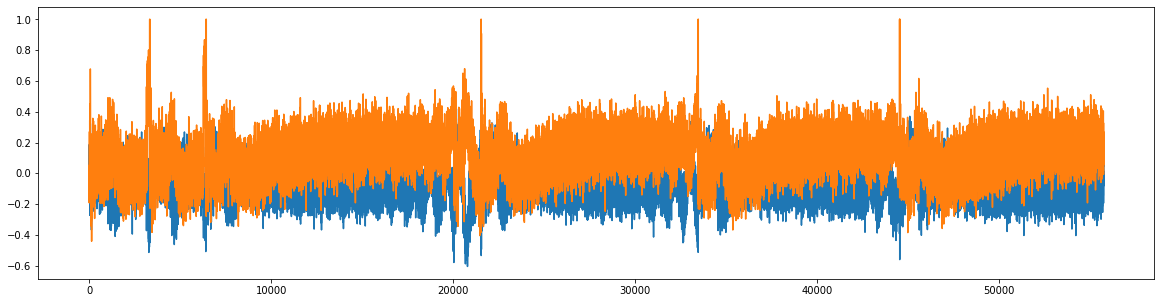

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(m1)
plt.plot(m2)
plt.show()